# King Count Houses - Insights  Project

# Basic setups

## IMPORTS

In [1]:
import math
import plotly.express as px
import pandas as pd
from IPython.core.display     import HTML
import seaborn       as sns
import datetime
import ipywidgets as widgets
from   ipywidgets import fixed
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

## Helper functions

In [2]:
#jupyter notebook settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

# Data Description

## Data Load

In [4]:
df_raw = pd.read_csv(r'../data/raw/kc_house_data.csv') 

## Data Overview

In [5]:
df_raw.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000 221900.00         3       1.00         1180      5650    1.00           0     0          3      7        1180              0      1955             0    98178 47.51 -122.26           1340        5650
1  6414100192  20141209T000000 538000.00         3       2.25         2570      7242    2.00           0     0          3      7        2170            400      1951          1991    98125 47.72 -122.32           1690        7639
2  5631500400  20150225T000000 180000.00         2       1.00          770     10000    1.00           0     0          3      6         770              0      1933             0    98028 47.74 -122.23           2720        8062
3  2487200875  20141209T000000 604000.00         4       3.00         1960      5000    1.00           0     0          5      7        1050            910      1965             0    98136 47.52 -122.39           1360        5000
4  1954400510  20150218T000000 510000.00         3       2.00         1680      8080    1.00           0     0          3      8        1680              0      1987             0    98074 47.62 -122.05           1800        7503

In [6]:
print ('The original dataset has {} transation registers with {} attributes.'.format(df_raw.shape[0], df_raw.shape[1]))

The original dataset has 21613 transation registers with 21 attributes.


In [7]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Types

In [8]:
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Tasks:

1°)Change 'waterfront' from 0 or 1 to yes or no

2°)Change 'date' to date format

## Check NA

In [9]:
df_raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Check Duplicated

In [10]:
df_raw['id'].duplicated().sum()

177

Task:

3) Identify the duplicated ones and drop if it is necessary.

## Check attributes

### Attribute 'grade'

It's an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [11]:
df_raw['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

### Attribute 'sqft_living15'

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

In [12]:
df_raw['sqft_living15'].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

Task 4) - Drop this feature

### Attibute 'sqft_lot15'

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [13]:
df_raw['sqft_lot15'].unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007], dtype=int64)

Task 6): Drop this feature

### Attribute 'view'

view - An index from 0 to 4 of how good the view of the property was

In [14]:
df_raw['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

***Decision*** 

Keep it.

## Statistics Data Overview

In [15]:
df_raw.describe().T

count          mean           std        min           25%           50%           75%           max
id            21613.00 4580301520.86 2876565571.31 1000102.00 2123049194.00 3904930410.00 7308900445.00 9900000190.00
price         21613.00     540088.14     367127.20   75000.00     321950.00     450000.00     645000.00    7700000.00
bedrooms      21613.00          3.37          0.93       0.00          3.00          3.00          4.00         33.00
bathrooms     21613.00          2.11          0.77       0.00          1.75          2.25          2.50          8.00
sqft_living   21613.00       2079.90        918.44     290.00       1427.00       1910.00       2550.00      13540.00
sqft_lot      21613.00      15106.97      41420.51     520.00       5040.00       7618.00      10688.00    1651359.00
floors        21613.00          1.49          0.54       1.00          1.00          1.50          2.00          3.50
waterfront    21613.00          0.01          0.09       0.00          0.00          0.00          0.00          1.00
view          21613.00          0.23          0.77       0.00          0.00          0.00          0.00          4.00
condition     21613.00          3.41          0.65       1.00          3.00          3.00          4.00          5.00
grade         21613.00          7.66          1.18       1.00          7.00          7.00          8.00         13.00
sqft_above    21613.00       1788.39        828.09     290.00       1190.00       1560.00       2210.00       9410.00
sqft_basement 21613.00        291.51        442.58       0.00          0.00          0.00        560.00       4820.00
yr_built      21613.00       1971.01         29.37    1900.00       1951.00       1975.00       1997.00       2015.00
yr_renovated  21613.00         84.40        401.68       0.00          0.00          0.00          0.00       2015.00
zipcode       21613.00      98077.94         53.51   98001.00      98033.00      98065.00      98118.00      98199.00
lat           21613.00         47.56          0.14      47.16         47.47         47.57         47.68         47.78
long          21613.00       -122.21          0.14    -122.52       -122.33       -122.23       -122.12       -121.31
sqft_living15 21613.00       1986.55        685.39     399.00       1490.00       1840.00       2360.00       6210.00
sqft_lot15    21613.00      12768.46      27304.18     651.00       5100.00       7620.00      10083.00     871200.00

Tasks:

6) There is a big std in the price, and seems to have outliers. Check it.

7) There is at least one house without bedrooms and one with 33. Check it.

8) There is at least one house without bathrooms. Check it.

9) There are houses with the year of renovation with '0'. It has to be treated.

# Data Transform/Preparing

In [16]:
df3 = df_raw.copy()

## Tasks

### Change 'waterfront' from 0 or 1 to yes or no

In [17]:
df3['waterfront'] = df3['waterfront'].apply(lambda x: 'yes' if x==1 else 'no')

### Change 'date' to date format

In [18]:
df3['date'] = pd.to_datetime(df3['date'])

### Identify the duplicated ones and drop if it is necessary

In [19]:
df_dup = df3[df3['id'].duplicated(keep = False )].reset_index(drop=True)

In [20]:
print ('There is {} duplicated registers in the dataframe. Duplicated registers with the same date will be dropped'.format(df_dup.shape[0]))

There is 353 duplicated registers in the dataframe. Duplicated registers with the same date will be dropped


In [21]:
ids_to_drop = df_dup.drop_duplicates(subset = ['id', 'date']).reset_index()
ids_to_drop.head()

index          id       date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
0      0  6021501535 2014-07-25  430000.00         3       1.50         1580      5000    1.00         no     0          3      8        1290            290      1939             0    98117 47.69 -122.39           1570        4500
1      1  6021501535 2014-12-23  700000.00         3       1.50         1580      5000    1.00         no     0          3      8        1290            290      1939             0    98117 47.69 -122.39           1570        4500
2      2  4139480200 2014-06-18 1384000.00         4       3.25         4290     12103    1.00         no     3          3     11        2690           1600      1997             0    98006 47.55 -122.10           3860       11244
3      3  4139480200 2014-12-09 1400000.00         4       3.25         4290     12103    1.00         no     3          3     11        2690           1600      1997             0    98006 47.55 -122.10           3860       11244
4      4  7520000520 2014-09-05  232000.00         2       1.00         1240     12092    1.00         no     0          3      6         960            280      1922          1984    98146 47.50 -122.35           1820        7460

There are not duplicated ids with the same id and date. 

### Drop 'sqft_living15'

### Drop 'sqft_lot15' 

In [22]:
df3 = df3.drop(columns = ['sqft_living15', 'sqft_lot15'], axis = 1)
df3.head()

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long
0  7129300520 2014-10-13 221900.00         3       1.00         1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26
1  6414100192 2014-12-09 538000.00         3       2.25         2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32
2  5631500400 2015-02-25 180000.00         2       1.00          770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23
3  2487200875 2014-12-09 604000.00         4       3.00         1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39
4  1954400510 2015-02-18 510000.00         3       2.00         1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05

### Check the std in the price

<AxesSubplot:xlabel='price', ylabel='Count'>

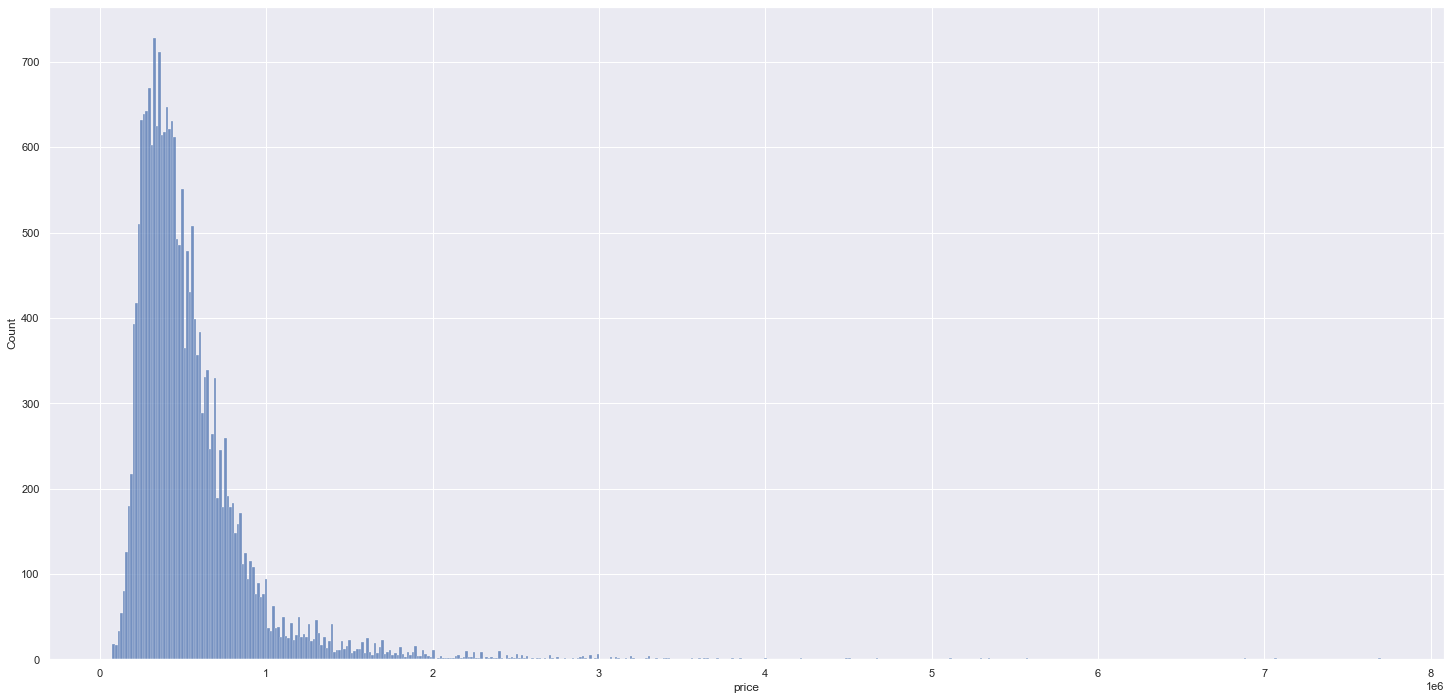

In [23]:
sns.histplot(data = df3, x=df3['price'], bins = 500)

There are some outliers on the highest prices. But in the next step, when we create other features derivated from the price. So we will keep them.

In [24]:
df3[df3['price'] == 75000] # cheapest house in the dataset

id       date    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long
1149  3421079032 2015-02-17 75000.00         1       0.00          670     43377    1.00         no     0          3      3         670              0      1966             0    98022 47.26 -121.91

In [25]:
df3[df3['price'] == 7700000] # most expensive house in the dataset

id       date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long
7252  6762700020 2014-10-13 7700000.00         6       8.00        12050     27600    2.50         no     3          4     13        8570           3480      1910          1987    98102 47.63 -122.32

The cheapest one is an old house that was not renovated, and the most expansive one seems to be a big classic house that was renovated. The lot size fit with the size of the house. It will be keeped, and this study will be deeped in the statistic analyisis.

### Registers with 0 and 33 bedrooms

In [26]:
zero_bed_df = df3[df3['bedrooms'] == 0] [['id','bathrooms','bedrooms','sqft_living', 'sqft_lot']]

In [27]:
print('There are {} registers without bedrooms. It will be droped.'.format(zero_bed_df.shape[0]))

There are 13 registers without bedrooms. It will be droped.


In [28]:
zero_bed = df3[df3['bedrooms'] == 0] ['id'].reset_index(drop=True).to_list()
df3 = df3[~df3['id'].isin(zero_bed)]

In [29]:
df3[df3['bedrooms']==33] # house with 33 bedrooms

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long
15870  2402100895 2014-06-25 640000.00        33       1.75         1620      6000    1.00         no     0          5      7        1040            580      1947             0    98103 47.69 -122.33

The lot size and number of floor do not fit with a 33 bedrooms house. It will be droped.

In [30]:
df3 = df3.drop(index = 15870) # index of the 33-bedrooms house

### Registers without bathrooms

In [31]:
zero_bath = df3[df3['bathrooms'] == 0] ['id'].reset_index(drop=True).to_list()

In [32]:
print ('There are {} registers without bathrooms. It will be droped.'.format(len(zero_bath)))

There are 3 registers without bathrooms. It will be droped.


In [33]:
df3 = df3[~df3['id'].isin(zero_bath)]

### There are houses with the year of renovation with '0'. 

Decision: Keep this.

# Feature Engeneering

In [34]:
df4 = df3.copy()

## Business Hipotesys

1) Houses with waterview are more expensive.

2) Houses that were not renovated are cheaper.

3) There is a season in the year that more houses are sell

4) There is a main numerical feature beyound the area and localization that raises the prices.

5) Localization is the most important categorical feature for houses.


## Average price per area

In [35]:
df4['price_area'] = df4['price'] / df4['sqft_living'] # price/sqft for each house
#using the major area betwwen sqft_lot and sqft_living bring a distorcion in the average prices.
df4.rename(columns = {'sqft_living': 'area'}, inplace=True)

In [36]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
area             0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price_area       0
dtype: int64

In [37]:
df4.head()

id       date     price  bedrooms  bathrooms  area  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  price_area
0  7129300520 2014-10-13 221900.00         3       1.00  1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26      188.05
1  6414100192 2014-12-09 538000.00         3       2.25  2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32      209.34
2  5631500400 2015-02-25 180000.00         2       1.00   770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23      233.77
3  2487200875 2014-12-09 604000.00         4       3.00  1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39      308.16
4  1954400510 2015-02-18 510000.00         3       2.00  1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05      303.57

## Average price per area per zipcode

In [38]:
zipcode_price_df = df4[['price_area', 'zipcode']].groupby('zipcode').mean().reset_index()
zipcode_price_df.rename(columns ={'price_area':'zipcode_price'},inplace=True)
zipcode_price_df.head()

zipcode  zipcode_price
0    98001         151.35
1    98002         151.17
2    98003         157.11
3    98004         475.44
4    98005         314.93

In [39]:
df4 = pd.merge(df4,zipcode_price_df, how='left', on='zipcode')

In [40]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
area             0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price_area       0
zipcode_price    0
dtype: int64

## location

In [41]:
# adequando o zip code
zipcode_df = df4[['zipcode','zipcode_price']]
zipcode_df = zipcode_df.drop_duplicates(subset = "zipcode")
zipcode_df = zipcode_df.sort_values(by='zipcode_price').reset_index(drop=True)
zipcode_df.head()

zipcode  zipcode_price
0    98023         148.92
1    98002         151.17
2    98001         151.35
3    98032         154.22
4    98030         155.16

In [42]:
zipcode_df['location'] = np.arange(zipcode_df.shape[0]) #creating the level for zipcodes prices
zipcode_df

zipcode  zipcode_price  location
0     98023         148.92         0
1     98002         151.17         1
2     98001         151.35         2
3     98032         154.22         3
4     98030         155.16         4
5     98092         155.81         5
6     98003         157.11         6
7     98031         161.10         7
8     98042         164.38         8
9     98188         169.01         9
10    98038         173.73        10
11    98168         175.37        11
12    98058         178.20        12
13    98198         178.43        13
14    98055         180.40        14
15    98022         182.11        15
16    98148         185.83        16
17    98178         189.17        17
18    98019         203.00        18
19    98059         207.24        19
20    98010         210.10        20
21    98065         211.04        21
22    98056         215.54        22
23    98045         219.35        23
24    98014         223.08        24
25    98108         224.44        25
26    98028         225.14        26
27    98146         225.49        27
28    98011         225.99        28
29    98166         226.20        29
30    98106         231.33        30
31    98077         244.28        31
32    98155         246.52        32
33    98072         247.51        33
34    98027         251.57        34
35    98024         252.30        35
36    98133         253.97        36
37    98118         262.62        37
38    98074         265.67        38
39    98034         265.95        39
40    98053         268.40        40
41    98075         268.64        41
42    98029         272.07        42
43    98070         277.85        43
44    98052         280.39        44
45    98125         282.67        45
46    98007         290.05        46
47    98126         292.80        47
48    98177         292.92        48
49    98006         299.09        49
50    98008         301.72        50
51    98144         312.24        51
52    98005         314.93        52
53    98136         337.22        53
54    98033         343.16        54
55    98116         348.55        55
56    98115         354.14        56
57    98117         363.54        57
58    98122         367.51        58
59    98103         369.80        59
60    98199         376.55        60
61    98107         382.95        61
62    98040         387.29        62
63    98105         405.15        63
64    98102         423.81        64
65    98119         432.26        65
66    98109         433.40        66
67    98112         438.64        67
68    98004         475.44        68
69    98039         568.08        69

In [43]:
df4 = pd.merge(df4, zipcode_df[['zipcode', 'location']], how='left', on='zipcode' )
df4.head()

id       date     price  bedrooms  bathrooms  area  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  price_area  zipcode_price  location
0  7129300520 2014-10-13 221900.00         3       1.00  1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26      188.05         189.17        17
1  6414100192 2014-12-09 538000.00         3       2.25  2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32      209.34         282.67        45
2  5631500400 2015-02-25 180000.00         2       1.00   770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23      233.77         225.14        26
3  2487200875 2014-12-09 604000.00         4       3.00  1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39      308.16         337.22        53
4  1954400510 2015-02-18 510000.00         3       2.00  1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05      303.57         265.67        38

In [44]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
area             0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price_area       0
zipcode_price    0
location         0
dtype: int64

## Trimester

In [45]:
print('Dataset goes since {} to {}.'.format(df4['date'].min(),df4['date'].max()) )

Dataset goes since 2014-05-02 00:00:00 to 2015-05-27 00:00:00.


In [46]:
def trimester_of_year(date):
    year = str(date.year)
    trimesters={ 'First': pd.date_range( start='01/01/'+year, end ='31/03/' +year),
            'Second': pd.date_range( start='01/04/'+year, end ='30/06/' +year),
             'Third': pd.date_range( start='01/07/'+year, end ='30/09/' +year),
            'Fourth': pd.date_range( start='01/10/'+year, end ='31/12/' +year)}
    if date in trimesters['First']:
        return 1.0
    if date in trimesters['Second']:
        return 2.0
    if date in trimesters['Third' ]:
        return 3.0
    else:
        return 4.0


In [47]:
df4['trimester'] = df4['date'].map(trimester_of_year)

In [48]:
df4.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
area             0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
price_area       0
zipcode_price    0
location         0
trimester        0
dtype: int64

In [49]:
df4.head()

id       date     price  bedrooms  bathrooms  area  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  price_area  zipcode_price  location  trimester
0  7129300520 2014-10-13 221900.00         3       1.00  1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26      188.05         189.17        17       4.00
1  6414100192 2014-12-09 538000.00         3       2.25  2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32      209.34         282.67        45       4.00
2  5631500400 2015-02-25 180000.00         2       1.00   770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23      233.77         225.14        26       1.00
3  2487200875 2014-12-09 604000.00         4       3.00  1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39      308.16         337.22        53       4.00
4  1954400510 2015-02-18 510000.00         3       2.00  1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05      303.57         265.67        38       1.00

# Exploratory Data Analisys (EDA)

In [50]:
df5 = df4.copy()

## Feature filtering

In [51]:
df5 = df5.drop(columns = ['price','sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long'], axis=1)
df5.head()

id       date  bedrooms  bathrooms  area  floors waterfront  view  condition  grade  yr_built  yr_renovated  zipcode  price_area  zipcode_price  location  trimester
0  7129300520 2014-10-13         3       1.00  1180    1.00         no     0          3      7      1955             0    98178      188.05         189.17        17       4.00
1  6414100192 2014-12-09         3       2.25  2570    2.00         no     0          3      7      1951          1991    98125      209.34         282.67        45       4.00
2  5631500400 2015-02-25         2       1.00   770    1.00         no     0          3      6      1933             0    98028      233.77         225.14        26       1.00
3  2487200875 2014-12-09         4       3.00  1960    1.00         no     0          5      7      1965             0    98136      308.16         337.22        53       4.00
4  1954400510 2015-02-18         3       2.00  1680    1.00         no     0          3      8      1987             0    98074      303.57         265.67        38       1.00

In [52]:
# attributes filtering
num_attributes = df5[['bedrooms', 'bathrooms', 'floors','area','price_area','zipcode_price']]

cat_attributes = df5[['id','price_area','date','trimester', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'location']]
#price_area in cat_attributes just to use for comparation
       

## Univariate Analisys

### Numerical Attributes

In [53]:
#central tendency statistics - mean, median
ct_mean   = pd.DataFrame ( num_attributes.apply (np.mean   ) ).T
ct_median = pd.DataFrame ( num_attributes.apply (np.median ) ).T

In [54]:
# dispersion statistics - standard deviation, minimum, maximum, range, skew, kurtosis
d_std      = pd.DataFrame ( num_attributes.apply (np.std) ).T
d_min      = pd.DataFrame ( num_attributes.apply (np.min) ).T
d_max      = pd.DataFrame ( num_attributes.apply (np.max) ).T
d_range    = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min())).T
d_skew     = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d_kurtosis = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

In [55]:
#concatenate
df_metrics = pd.concat ([d_min,d_max,d_range,ct_mean,ct_median,d_std,d_skew,d_kurtosis]).T.reset_index()
df_metrics.columns = ['attributes', 'min.','max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df_metrics

attributes   min.      max    range    mean  median    std  skew  kurtosis
0       bedrooms   1.00    11.00    10.00    3.37    3.00   0.90  0.55      1.80
1      bathrooms   0.50     8.00     7.50    2.12    2.25   0.77  0.52      1.28
2         floors   1.00     3.50     2.50    1.49    1.50   0.54  0.61     -0.49
3           area 370.00 13540.00 13170.00 2080.34 1910.00 918.10  1.47      5.25
4     price_area  87.59   810.14   722.55  264.11  244.63 109.96  1.25      2.10
5  zipcode_price 148.92   568.08   419.16  264.11  262.62  81.82  0.56     -0.23

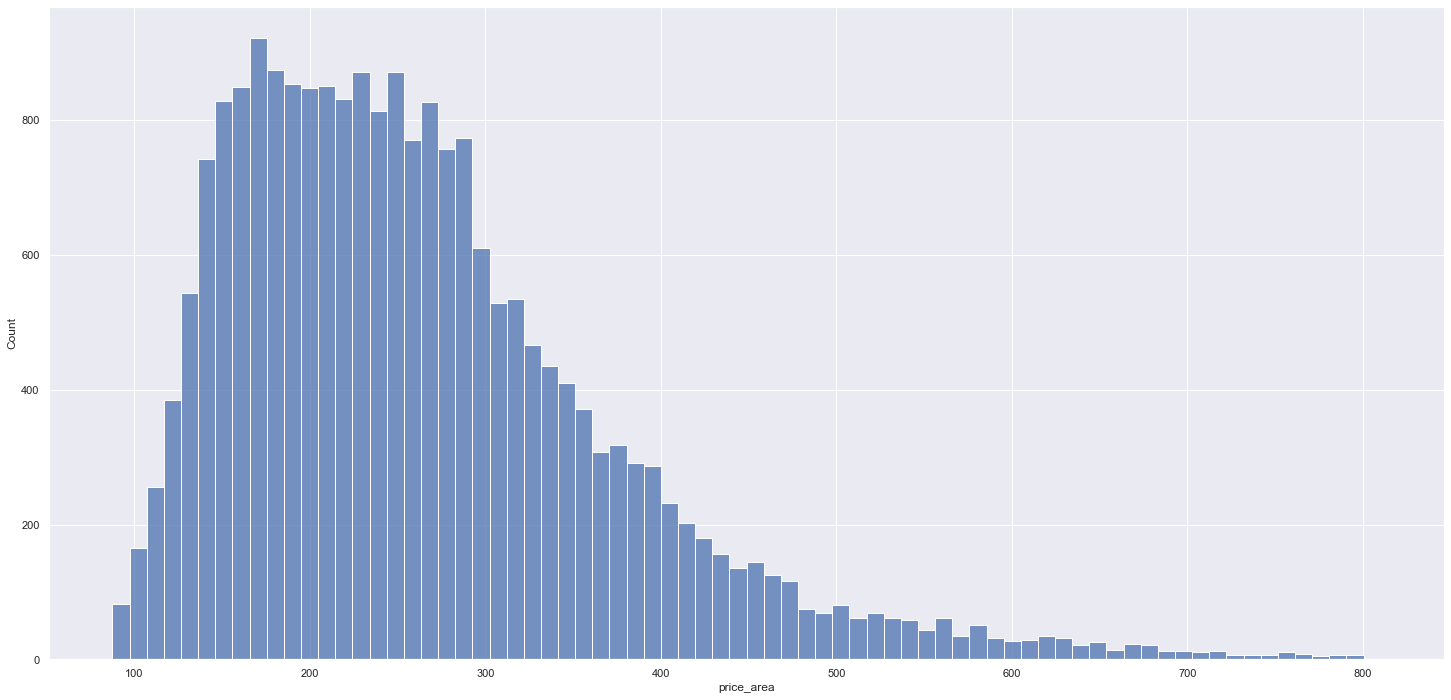

In [56]:
sns.histplot(data = df5, x=df5['price_area'])
plt.savefig(r'../reports/figures/price_area_distribution.png')

array([[<AxesSubplot:title={'center':'zipcode_price'}>]], dtype=object)

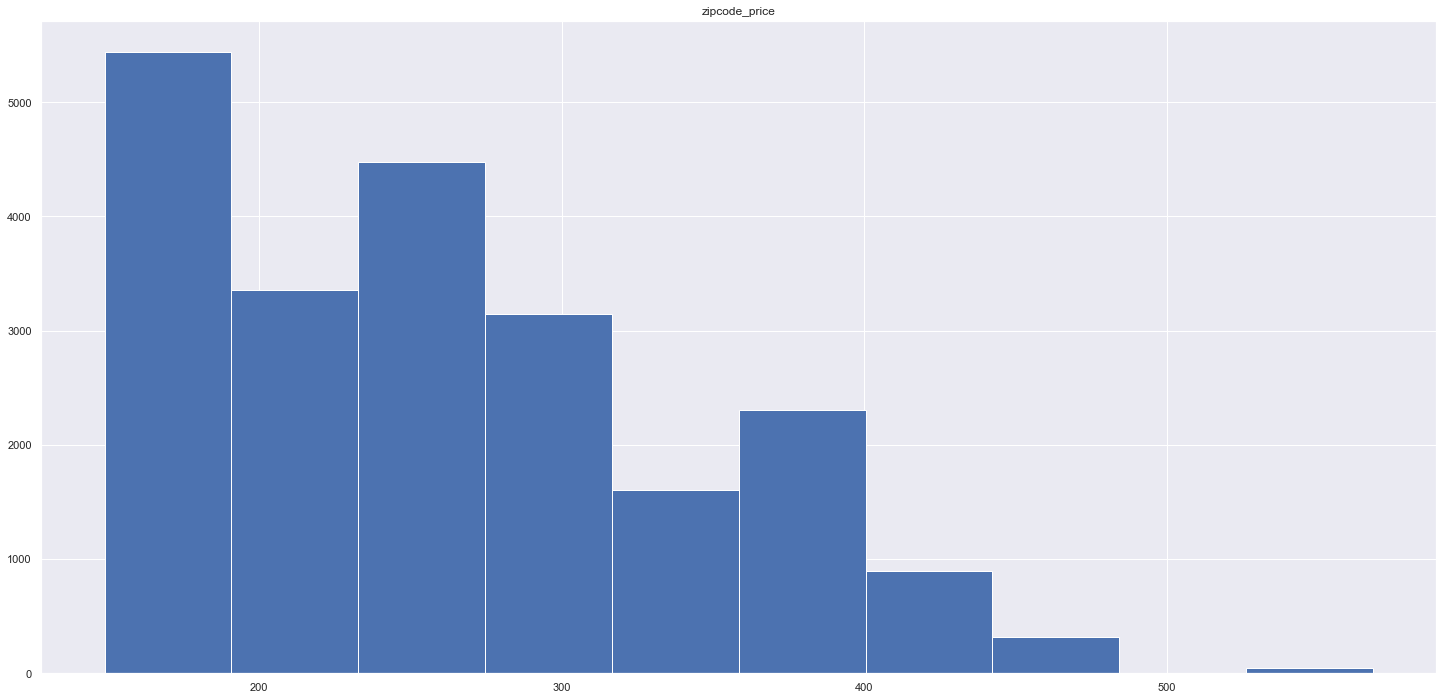

In [57]:
df5.hist(column='zipcode_price')

In [58]:
#statistics of the houses below the location price 
below_median = df5[df5['price_area'] < df5['zipcode_price']]
below_median.describe().T

count          mean           std        min           25%           50%           75%           max
id            12329.00 4572869844.38 2857832630.09 1000102.00 2143700861.00 3904902510.00 7276100282.00 9900000190.00
bedrooms      12329.00          3.58          0.90       1.00          3.00          4.00          4.00         11.00
bathrooms     12329.00          2.25          0.72       0.50          1.75          2.50          2.50          8.00
area          12329.00       2280.80        840.72     430.00       1690.00       2150.00       2730.00      13540.00
floors        12329.00          1.55          0.55       1.00          1.00          1.50          2.00          3.50
view          12329.00          0.16          0.61       0.00          0.00          0.00          0.00          4.00
condition     12329.00          3.37          0.63       1.00          3.00          3.00          4.00          5.00
grade         12329.00          7.69          1.08       4.00          7.00          8.00          8.00         13.00
yr_built      12329.00       1973.63         28.89    1900.00       1955.00       1978.00       1999.00       2015.00
yr_renovated  12329.00         74.26        377.66       0.00          0.00          0.00          0.00       2015.00
zipcode       12329.00      98078.76         53.61   98001.00      98033.00      98070.00      98118.00      98199.00
price_area    12329.00        219.64         73.96      87.59        158.88        211.73        264.82        565.36
zipcode_price 12329.00        263.78         81.31     148.92        189.17        262.62        312.24        568.08
location      12329.00         34.51         19.51       0.00         17.00         37.00         51.00         69.00
trimester     12329.00          2.58          1.03       1.00          2.00          3.00          3.00          4.00

### Categorical Attributes

In [59]:
cat_attributes.head()

id  price_area       date  trimester waterfront  view  condition  grade  yr_built  yr_renovated  location
0  7129300520      188.05 2014-10-13       4.00         no     0          3      7      1955             0        17
1  6414100192      209.34 2014-12-09       4.00         no     0          3      7      1951          1991        45
2  5631500400      233.77 2015-02-25       1.00         no     0          3      6      1933             0        26
3  2487200875      308.16 2014-12-09       4.00         no     0          5      7      1965             0        53
4  1954400510      303.57 2015-02-18       1.00         no     0          3      8      1987             0        38

In [60]:
total_houses = df5.shape[0]

wf_number    = cat_attributes [ cat_attributes ['waterfront'] == 'yes'].shape[0]

lqd_number   = cat_attributes [ cat_attributes ['grade'] <=3 ].shape[0]

hq_number    = cat_attributes [ cat_attributes ['grade'] >= 11].shape[0]

avgq_number  = total_houses - lqd_number - hq_number

In [61]:
print ( 'Dataset has {} houses with waterview, what corresponding to {:.2f} % of the dataset\n' .format( wf_number, (wf_number/total_houses)*100))
print ( 'Dataset has {} houses with low quality design , what corresponding to {:.2f} % of the dataset\n' .format( lqd_number, (lqd_number/total_houses)*100))
print ( 'Dataset has {} houses with average quality design , what corresponding to {:.2f} % of the dataset\n' .format( avgq_number, (avgq_number/total_houses)*100))
print ( 'Dataset has {} houses with high quality design , what corresponding to {:.2f} % of the dataset' .format( hq_number, (hq_number/total_houses)*100))

Dataset has 163 houses with waterview, what corresponding to 0.75 % of the dataset

Dataset has 1 houses with low quality design , what corresponding to 0.00 % of the dataset

Dataset has 21094 houses with average quality design , what corresponding to 97.68 % of the dataset

Dataset has 501 houses with high quality design , what corresponding to 2.32 % of the dataset


## Bivariate Analysis

### Numerical attributes

#### Price variation with number of bedrooms

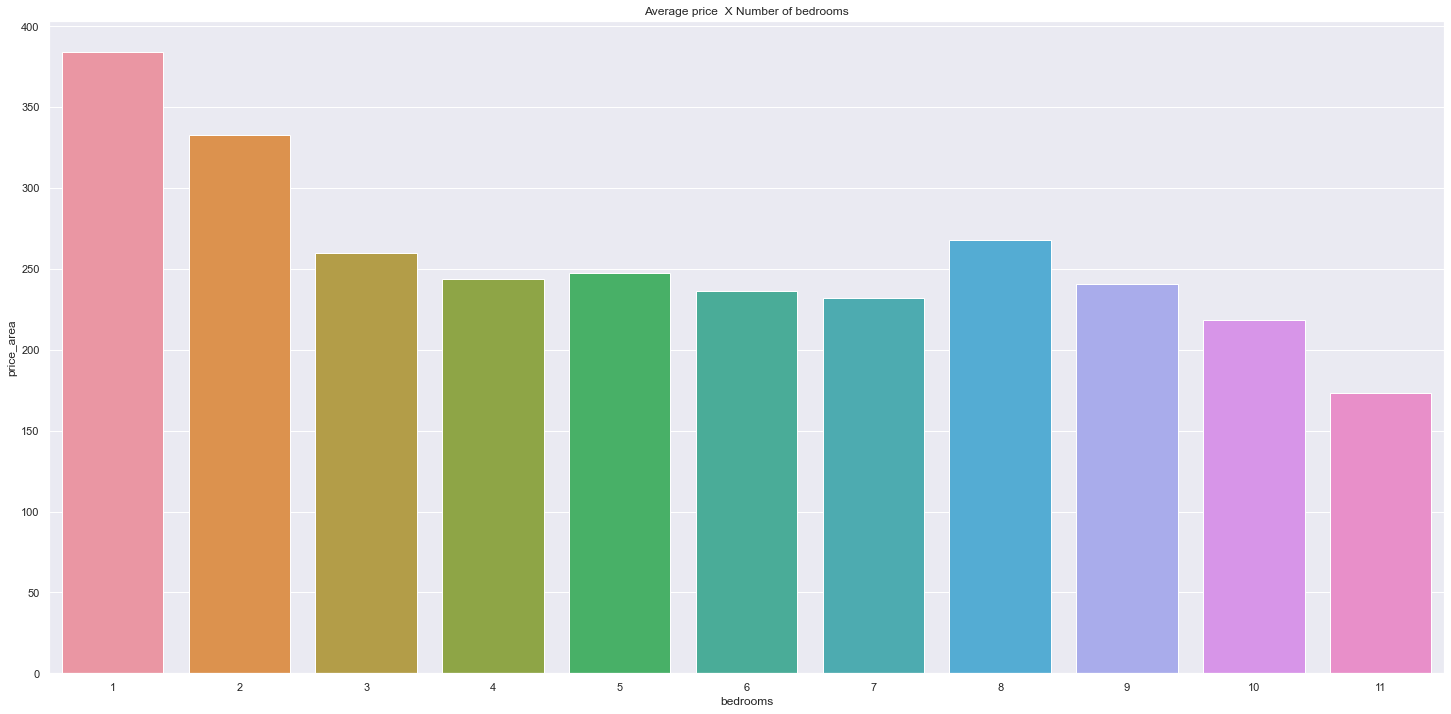

In [62]:
aux57 = num_attributes[['price_area','bedrooms']].groupby('bedrooms').mean().reset_index()
sns.barplot(x='bedrooms', y='price_area', data = aux57).set_title('Average price  X Number of bedrooms');
plt.savefig(r'../reports/figures/avg_price_per__bedrooms.png')

#### Price variation with number of bathrooms

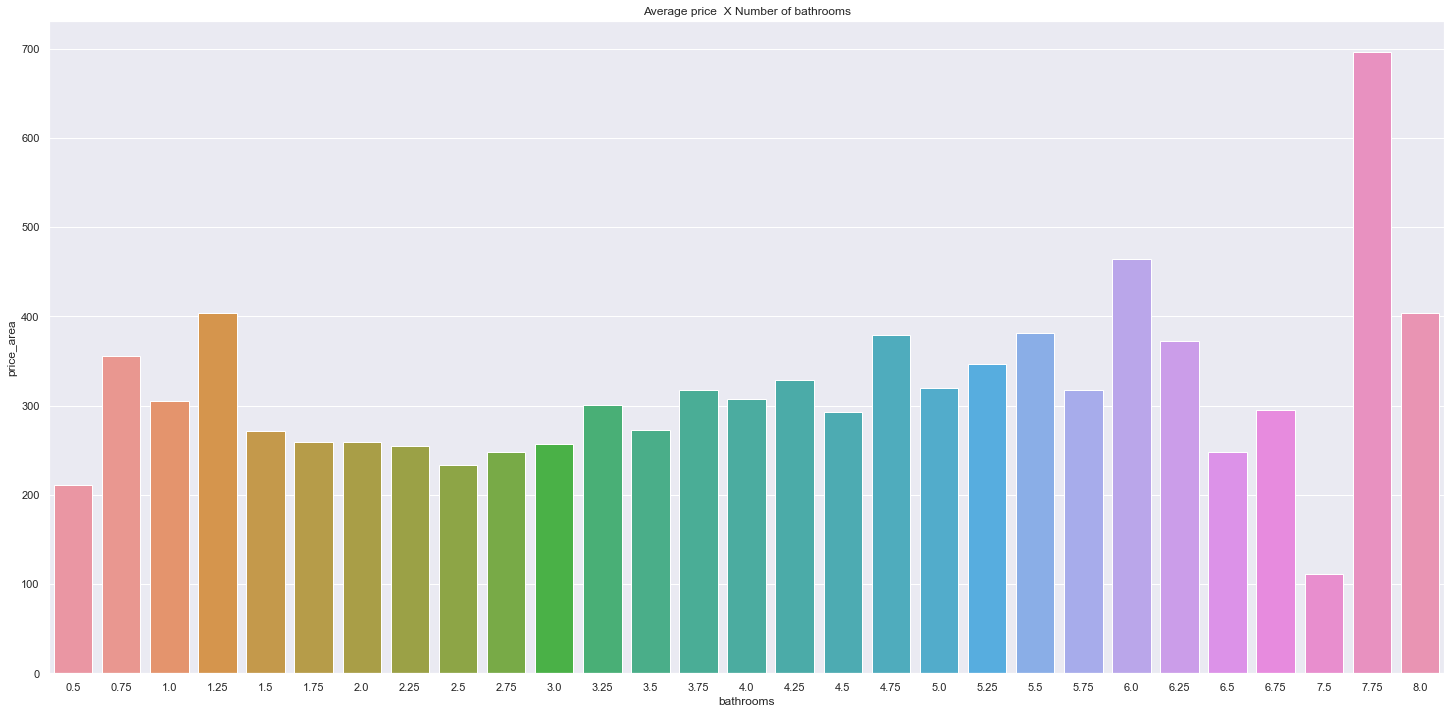

In [63]:
aux57 = num_attributes[['price_area','bathrooms']].groupby('bathrooms').mean().reset_index()
sns.barplot(x='bathrooms', y='price_area', data = aux57).set_title('Average price  X Number of bathrooms');
plt.savefig(r'../reports/figures/avg_price_per__bathrooms.png')

#### Price variation with number of floors

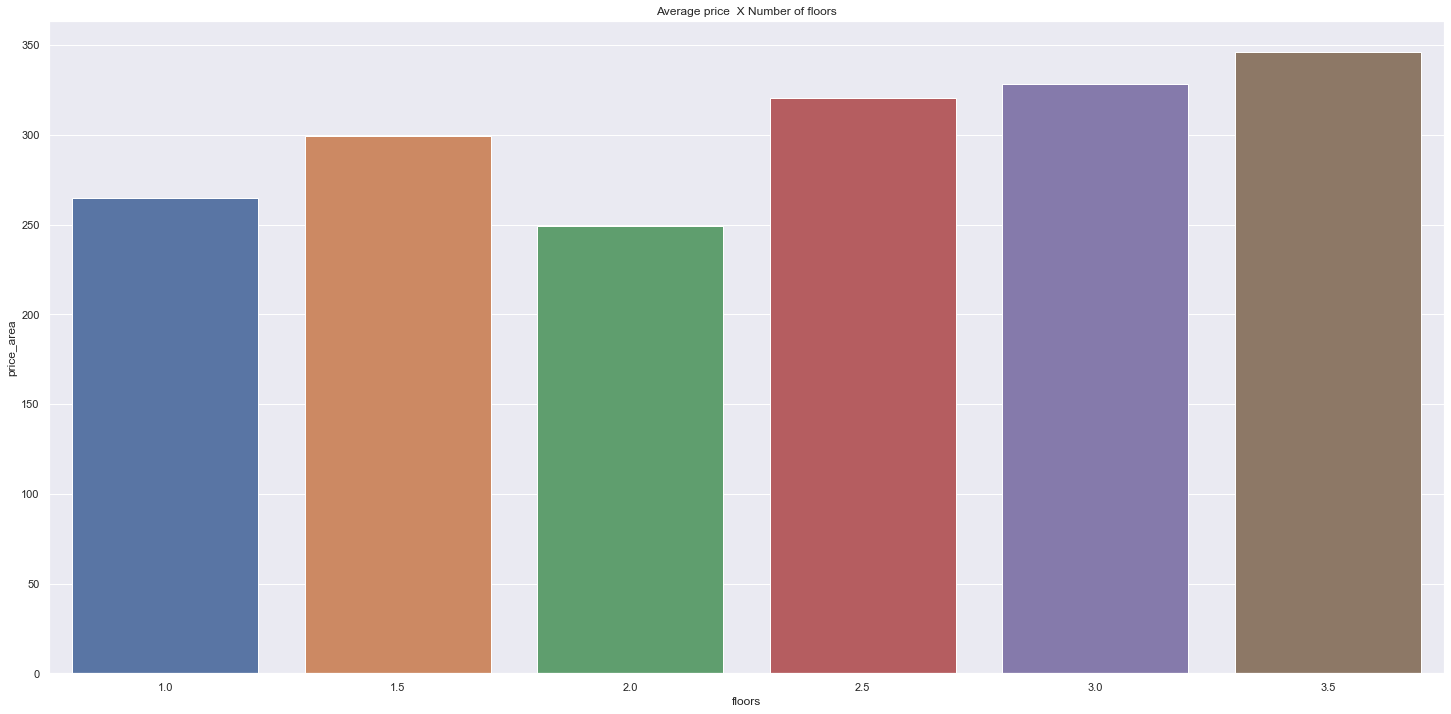

In [64]:
aux57 = num_attributes[['price_area','floors']].groupby('floors').mean().reset_index()
sns.barplot(x='floors', y='price_area', data = aux57).set_title('Average price  X Number of floors');
plt.savefig(r'../reports/figures/avg_price_per__floors.png')

### Categorical attibutes

<AxesSubplot:xlabel='view', ylabel='price_area'>

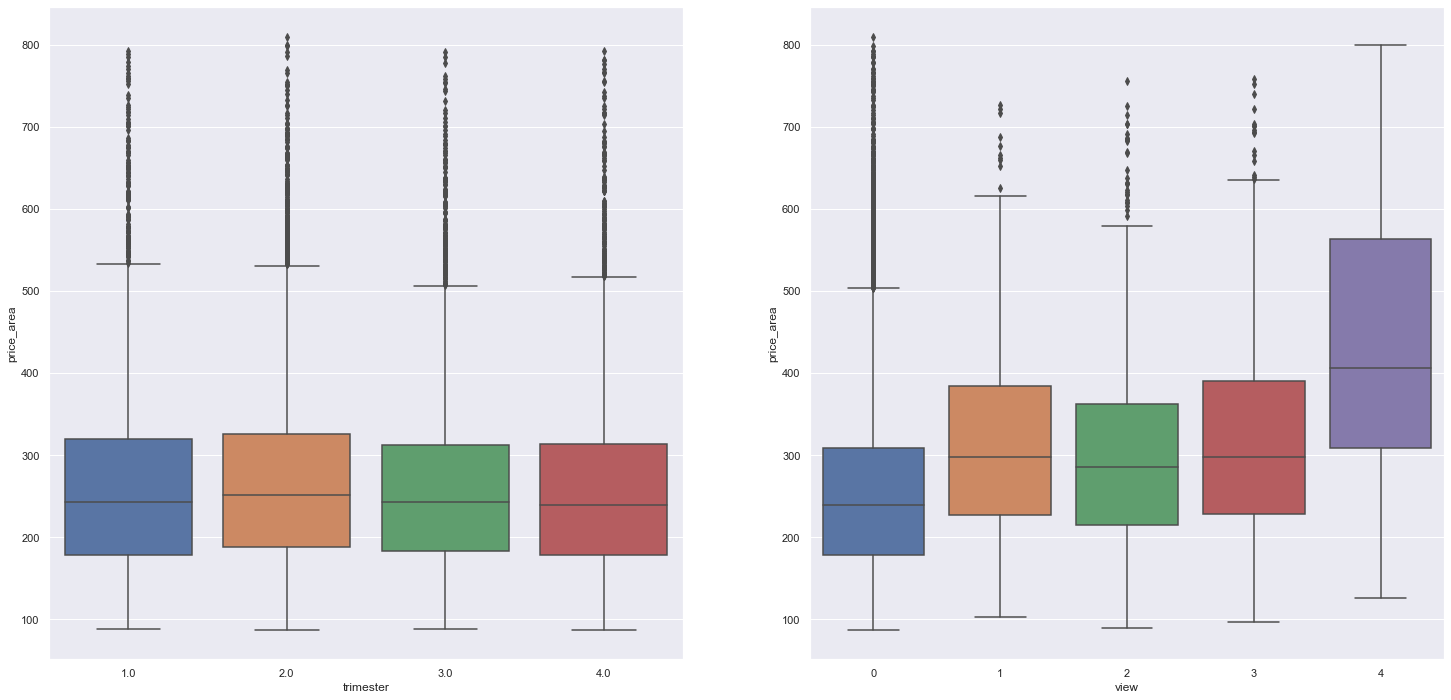

In [65]:
plt.subplot (1,2,1)
sns.boxplot ( x = 'trimester' ,   y = 'price_area', data = cat_attributes)
plt.subplot (1,2,2) 
sns.boxplot ( x = 'view',         y = 'price_area', data = cat_attributes)

<AxesSubplot:xlabel='condition', ylabel='price_area'>

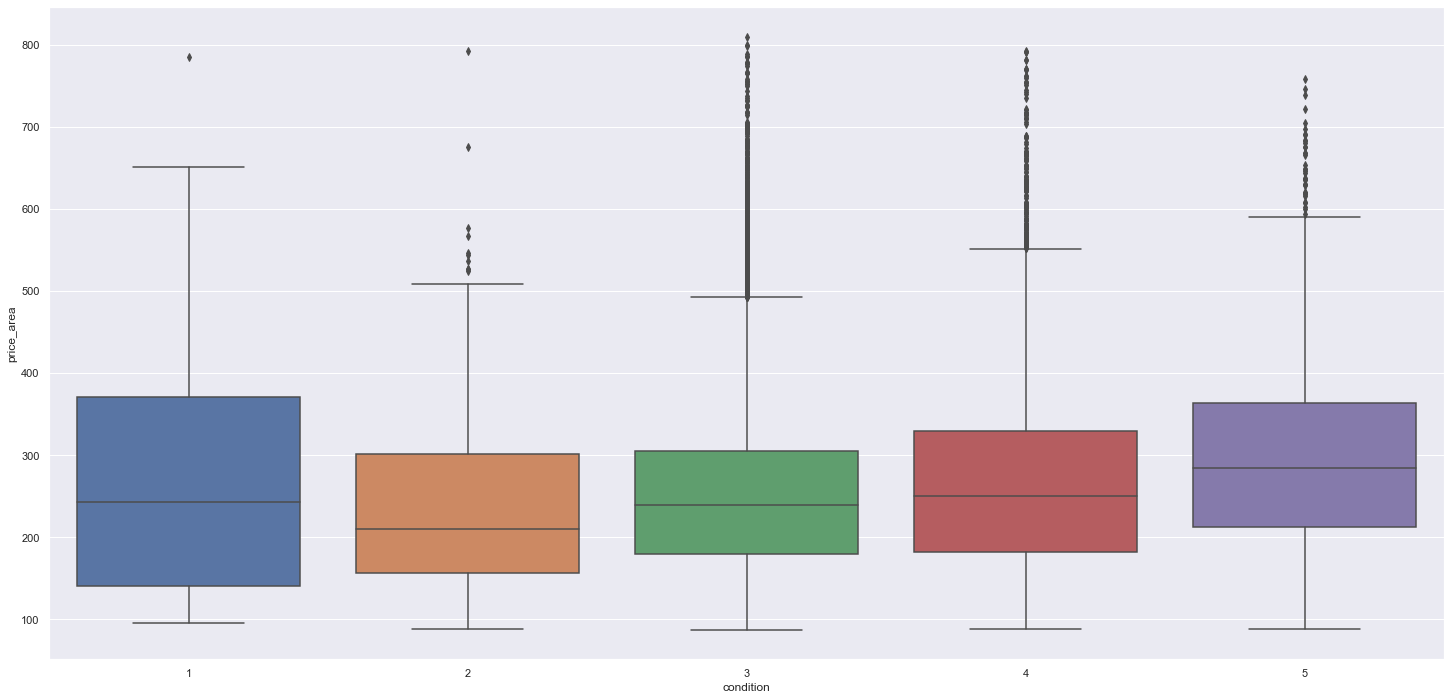

In [66]:
sns.boxplot ( x = 'condition',    y = 'price_area', data = cat_attributes)

<AxesSubplot:xlabel='grade', ylabel='price_area'>

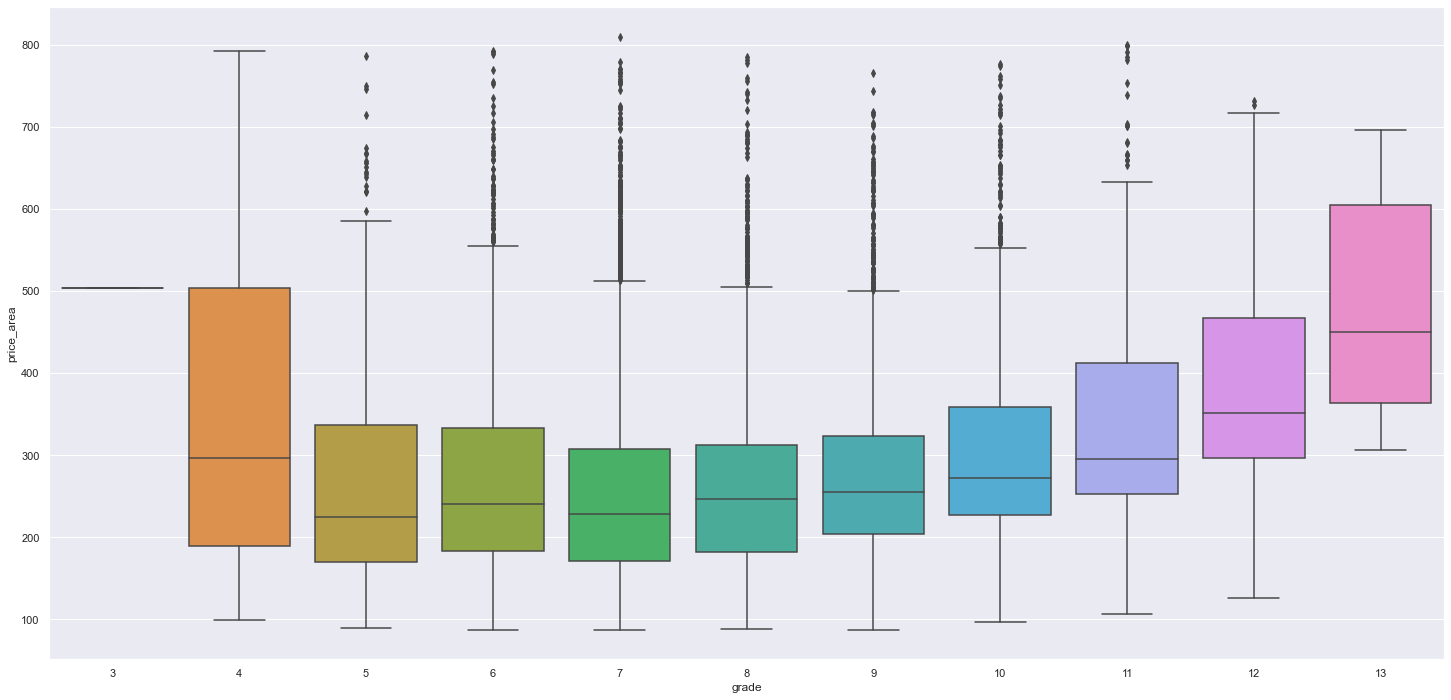

In [67]:
sns.boxplot ( x = 'grade', y = 'price_area', data = cat_attributes)

<AxesSubplot:xlabel='yr_built', ylabel='price_area'>

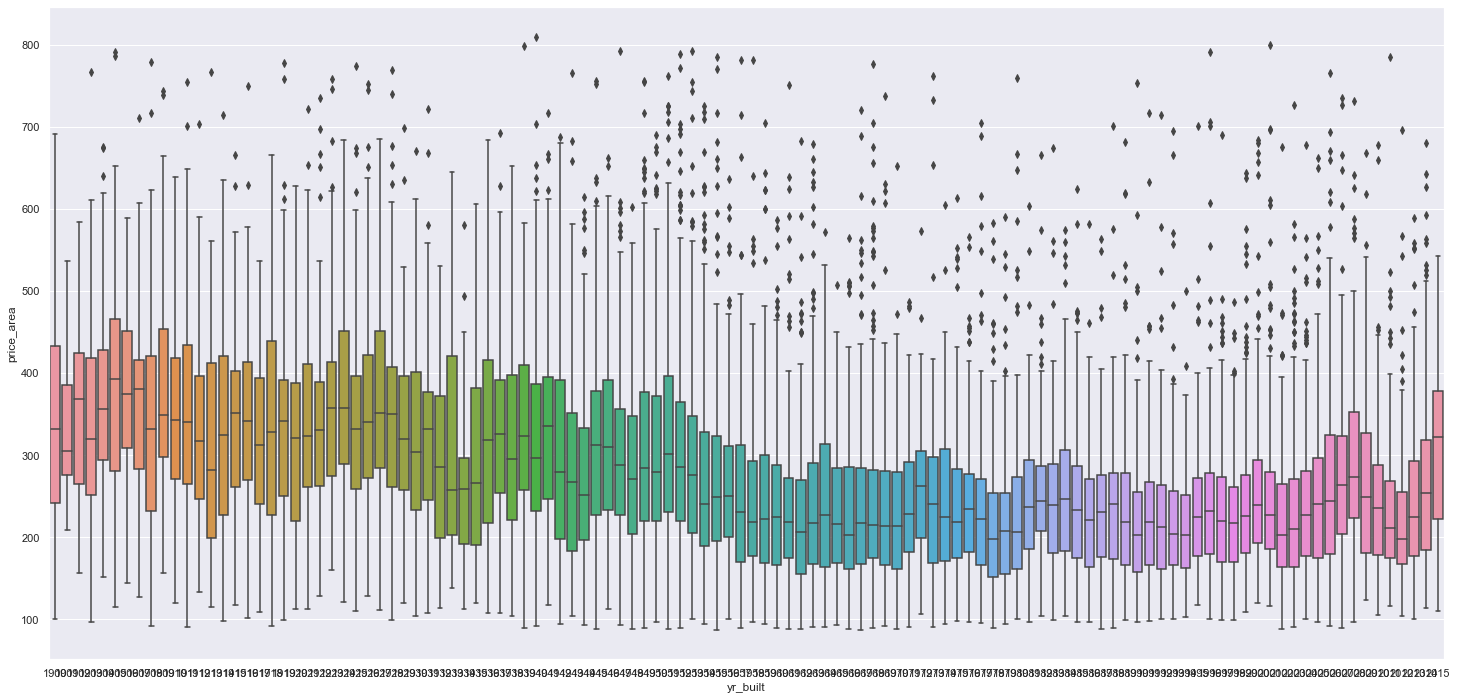

In [68]:
sns.boxplot ( x = 'yr_built',     y = 'price_area', data = cat_attributes)

<AxesSubplot:xlabel='yr_renovated', ylabel='price_area'>

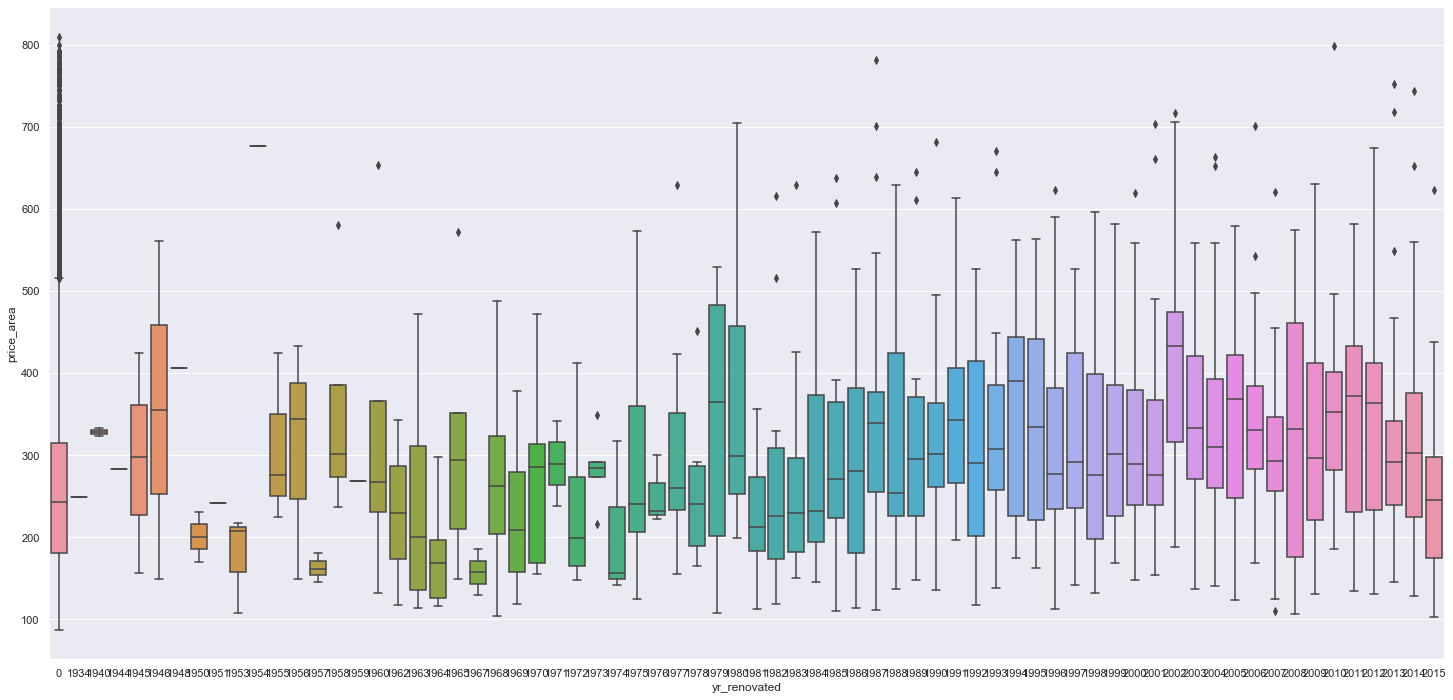

In [69]:
sns.boxplot ( x = 'yr_renovated', y = 'price_area', data = cat_attributes)

<AxesSubplot:xlabel='location', ylabel='price_area'>

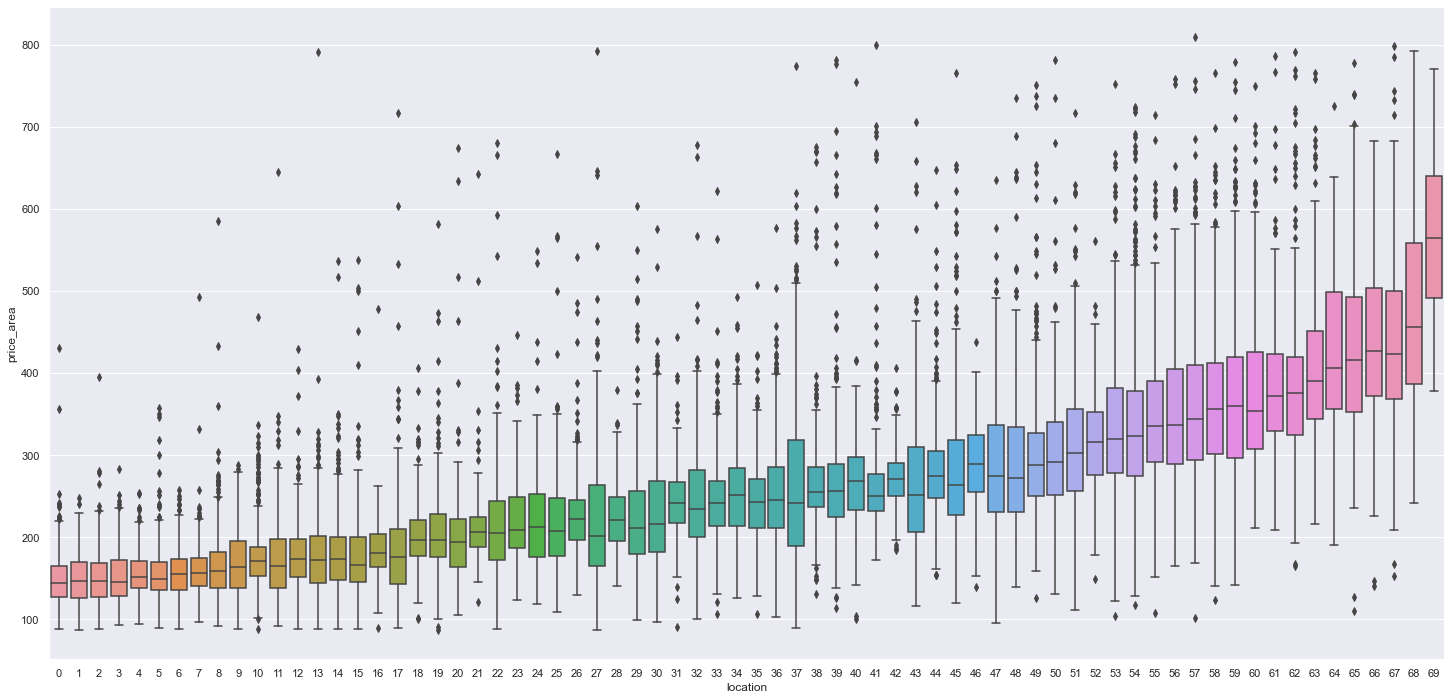

In [70]:
sns.boxplot ( x = 'location',     y = 'price_area', data = cat_attributes)

#### Average price for view

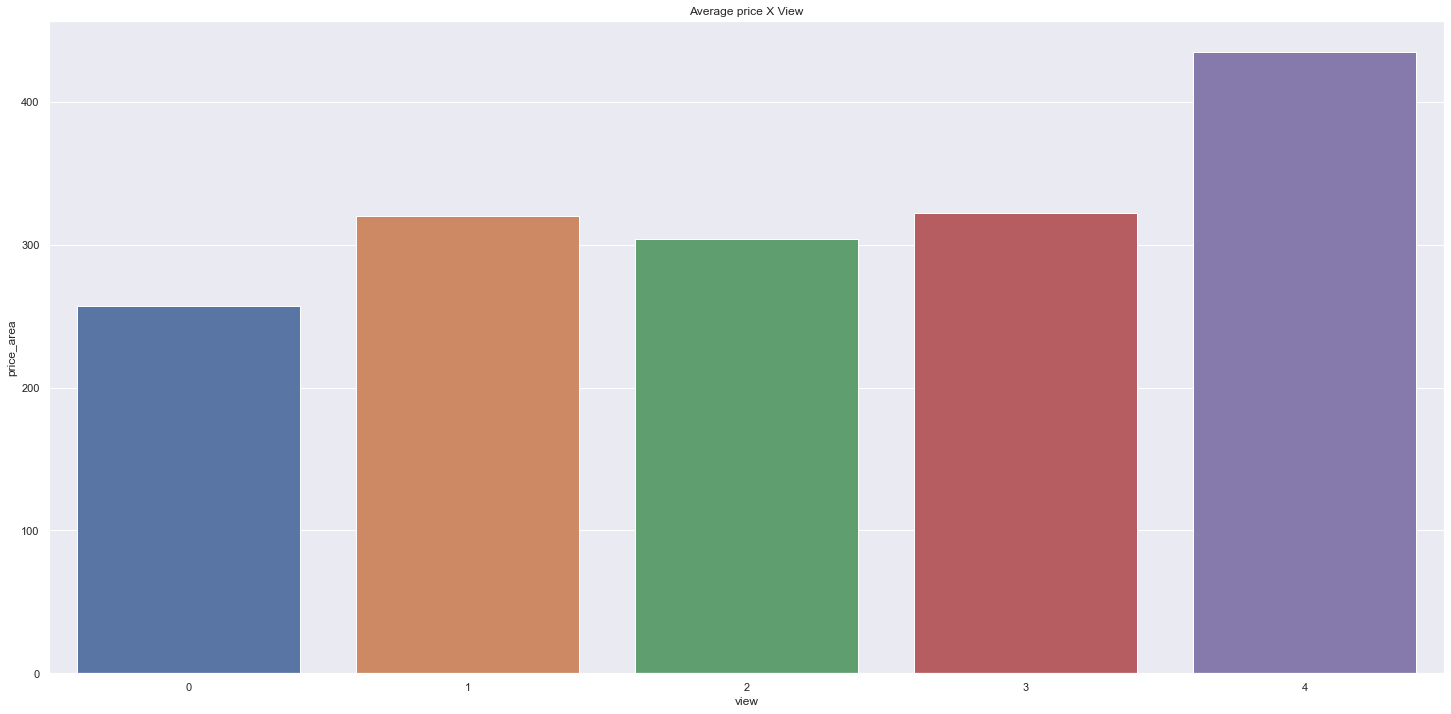

In [71]:
aux5 = cat_attributes[['price_area','view']].groupby('view').mean().reset_index()
sns.barplot(x='view', y ='price_area', data=aux5).set_title('Average price X View')
plt.savefig(r'../reports/figures/avg_price_view.png')

#### Average price for grade

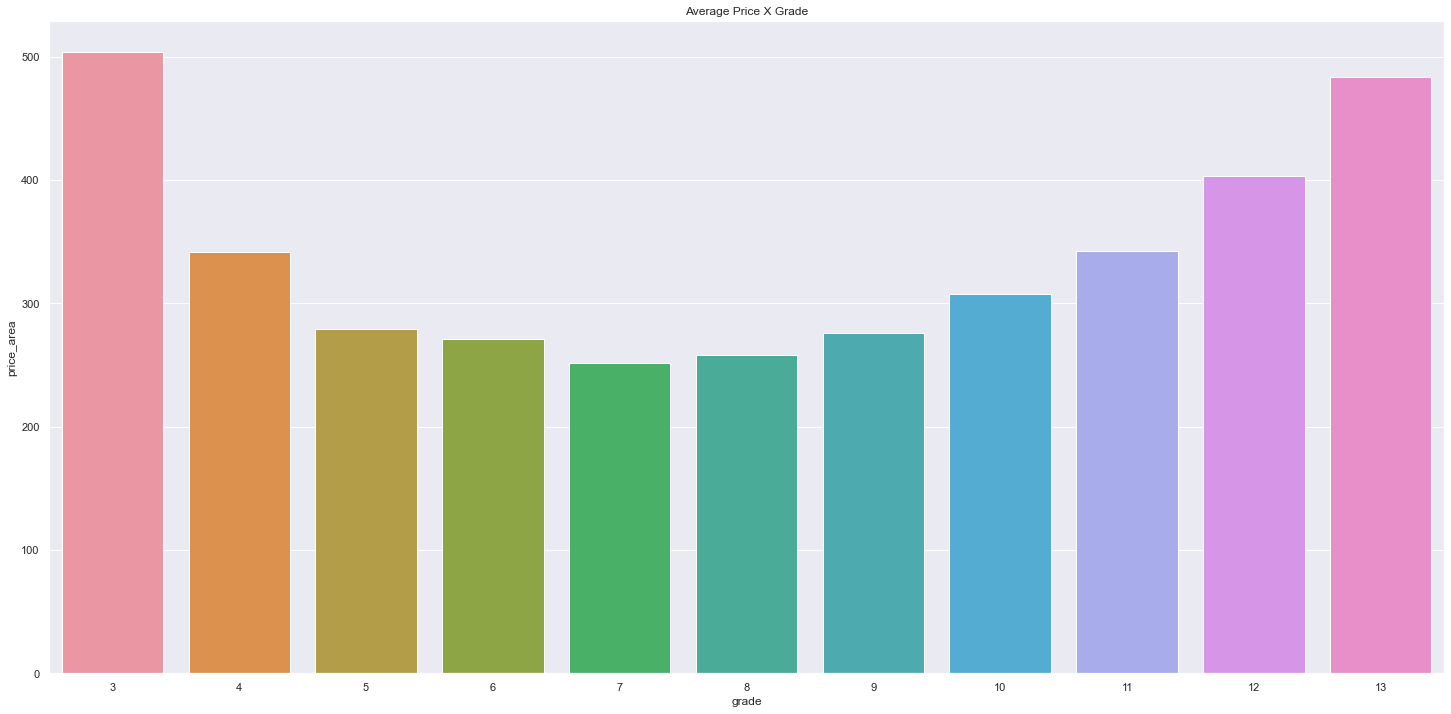

In [72]:
aux51 = cat_attributes[['price_area', 'grade']].groupby('grade').mean().reset_index()
sns.barplot(x='grade', y='price_area', data=aux51).set_title('Average Price X Grade')
plt.savefig(r'../reports/figures/avg_price_grade.png')

#### Average price for condition

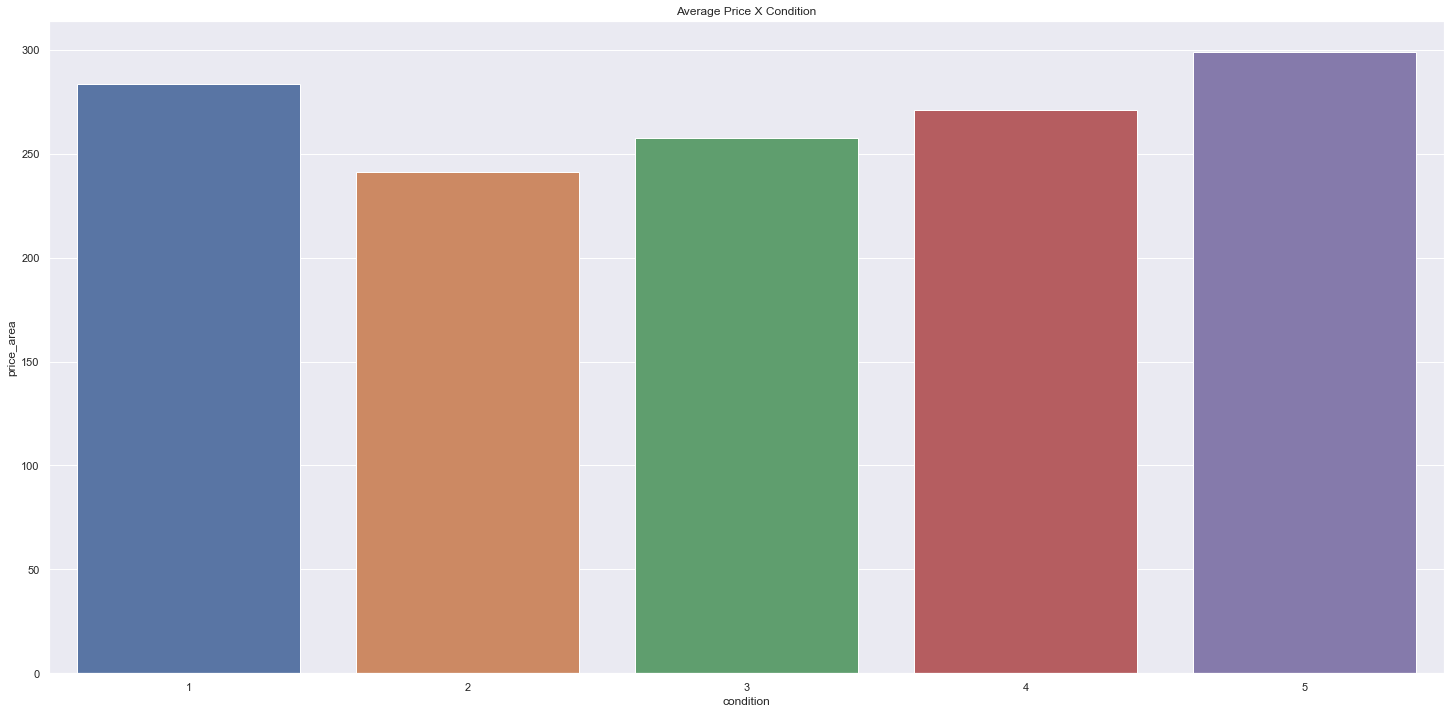

In [73]:
aux52 = cat_attributes[['price_area', 'condition']].groupby('condition').mean().reset_index()
sns.barplot (x='condition', y='price_area', data = aux52).set_title('Average Price X Condition');
plt.savefig(r'../reports/figures/avg_price_condition.png')

It seems that its more valuable buy a 4-condition house and make a lift to a 5-condition and sell it. 

#### Average price per Location

In [74]:
aux53 = cat_attributes[['price_area', 'location']].groupby('location').mean().reset_index()
aux53 = aux53.sort_values(['price_area']).reset_index(drop=True)
aux53.head()

location  price_area
0         0      148.92
1         1      151.17
2         2      151.35
3         3      154.22
4         4      155.16

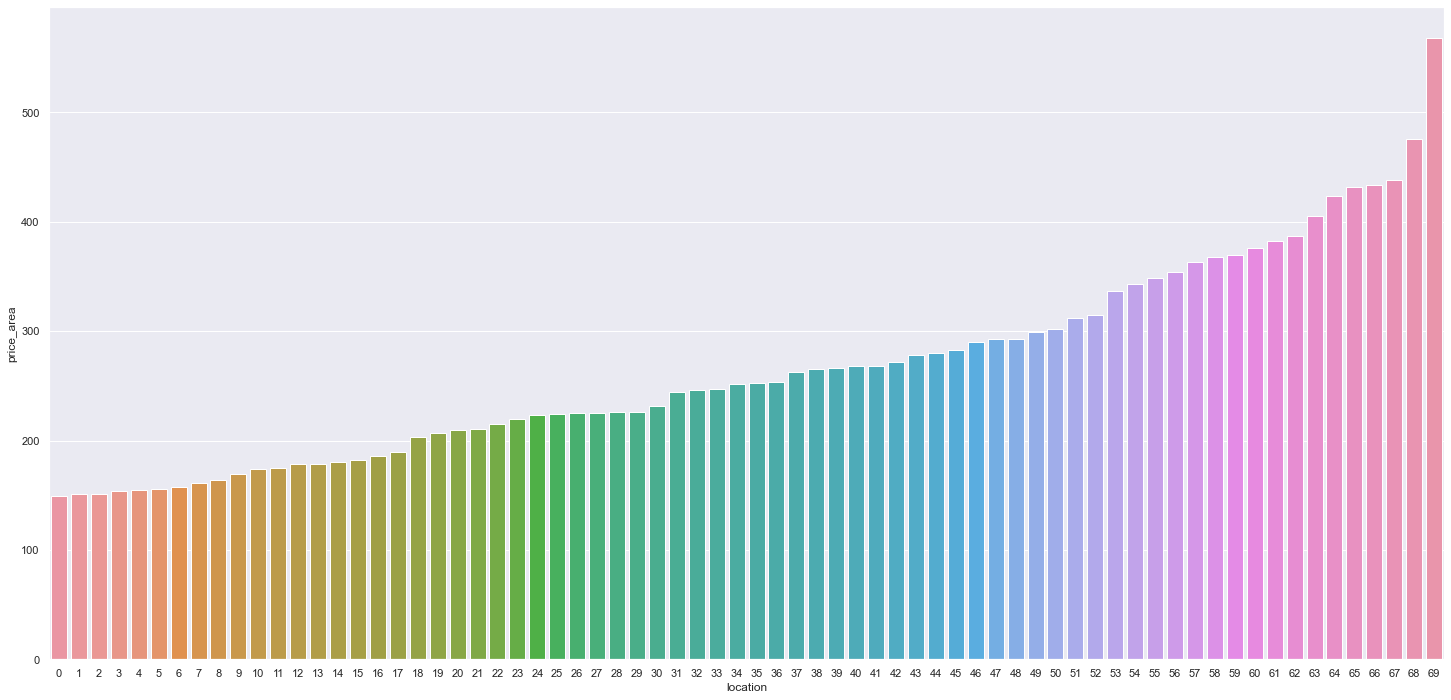

In [75]:
sns.barplot(x='location', y='price_area', data = aux53);

#### Average price per year built

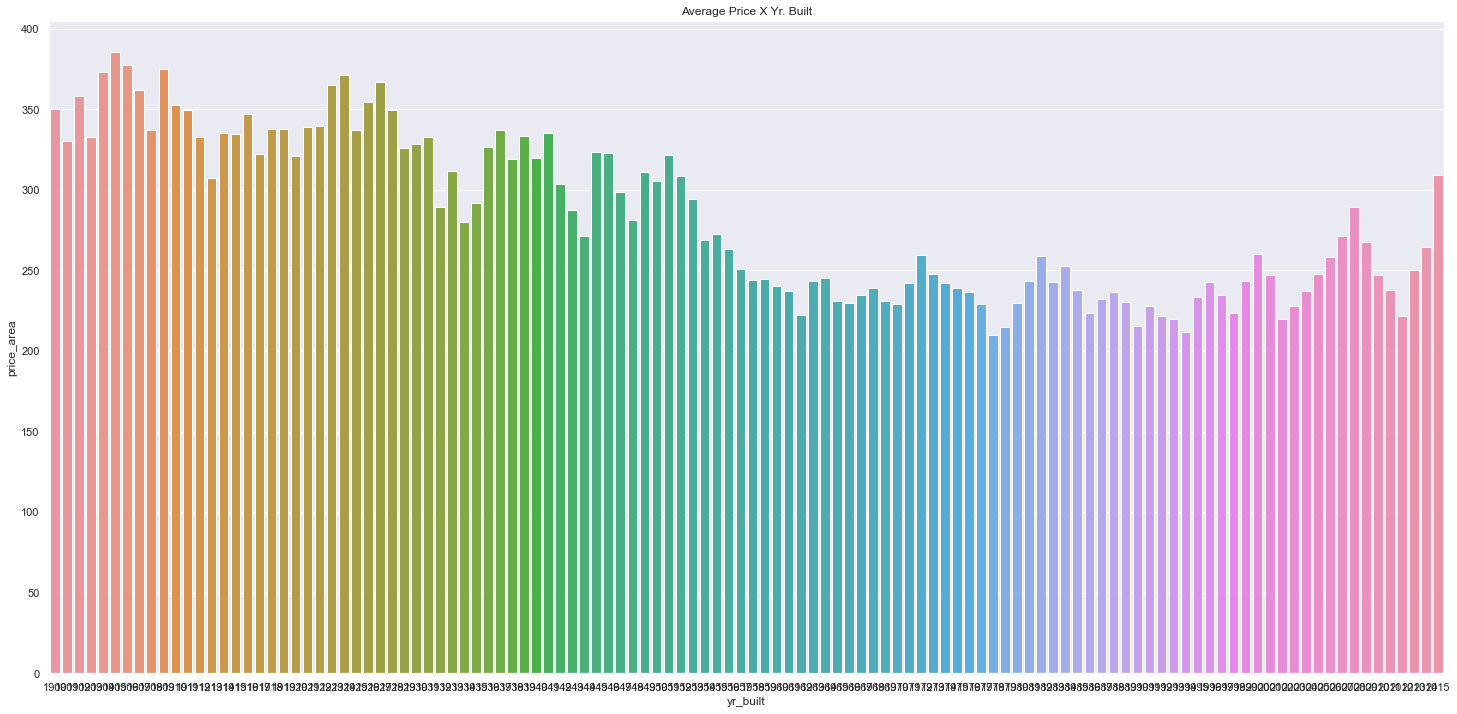

In [77]:
aux54 = cat_attributes[['price_area', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.barplot(x='yr_built', y='price_area', data = aux54).set_title('Average Price X Yr. Built');
plt.savefig(r'../reports/figures/avg_price_yr_built')

#### Average price per year renovated

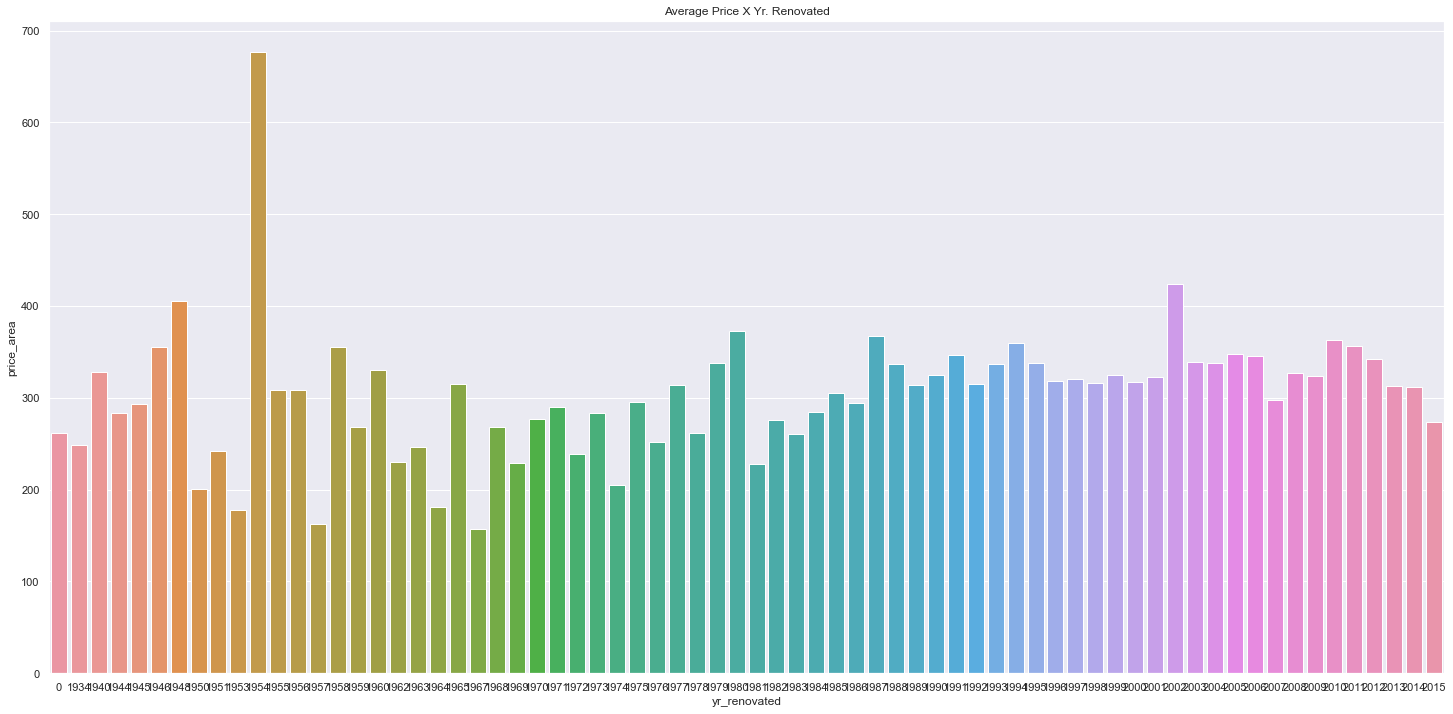

In [78]:
aux55 = cat_attributes[['price_area', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.barplot(x='yr_renovated', y='price_area', data = aux55).set_title('Average Price X Yr. Renovated');
plt.savefig(r'../reports/figures/avg_price_yr_renovated.png')

#### Number of transations for time of year

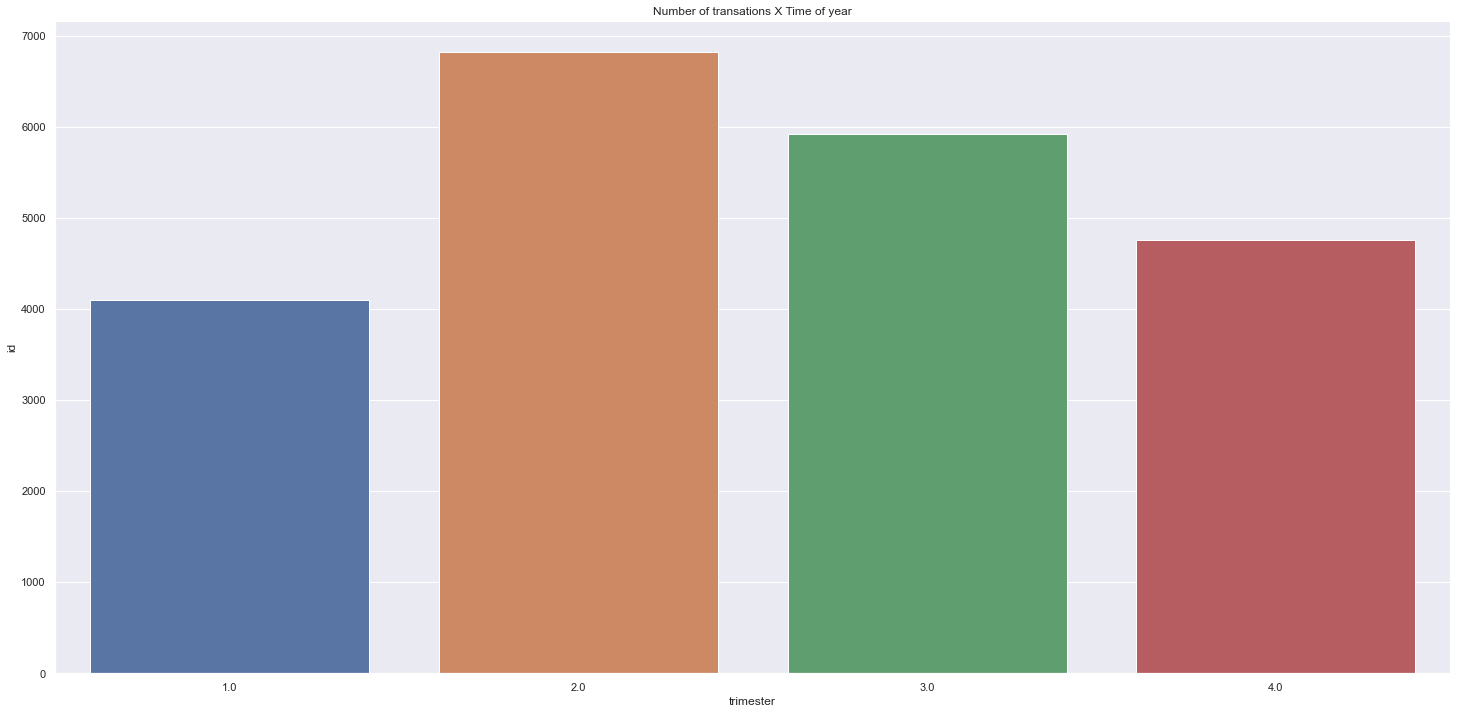

In [79]:
aux56 = cat_attributes[['id','trimester']].groupby('trimester').count().reset_index()
sns.barplot(x='trimester', y='id', data = aux56).set_title('Number of transations X Time of year');
plt.savefig(r'../reports/figures/transations_per__yr.png')

The major part of house transations occurs in the second trimester, as the minor is in the first.

## Mutivariated Analisys

In [80]:
multi_analysis = df5.copy()
multi_analysis.drop(labels = ['id', 'date', 'waterfront','zipcode'],axis=1, inplace=True)

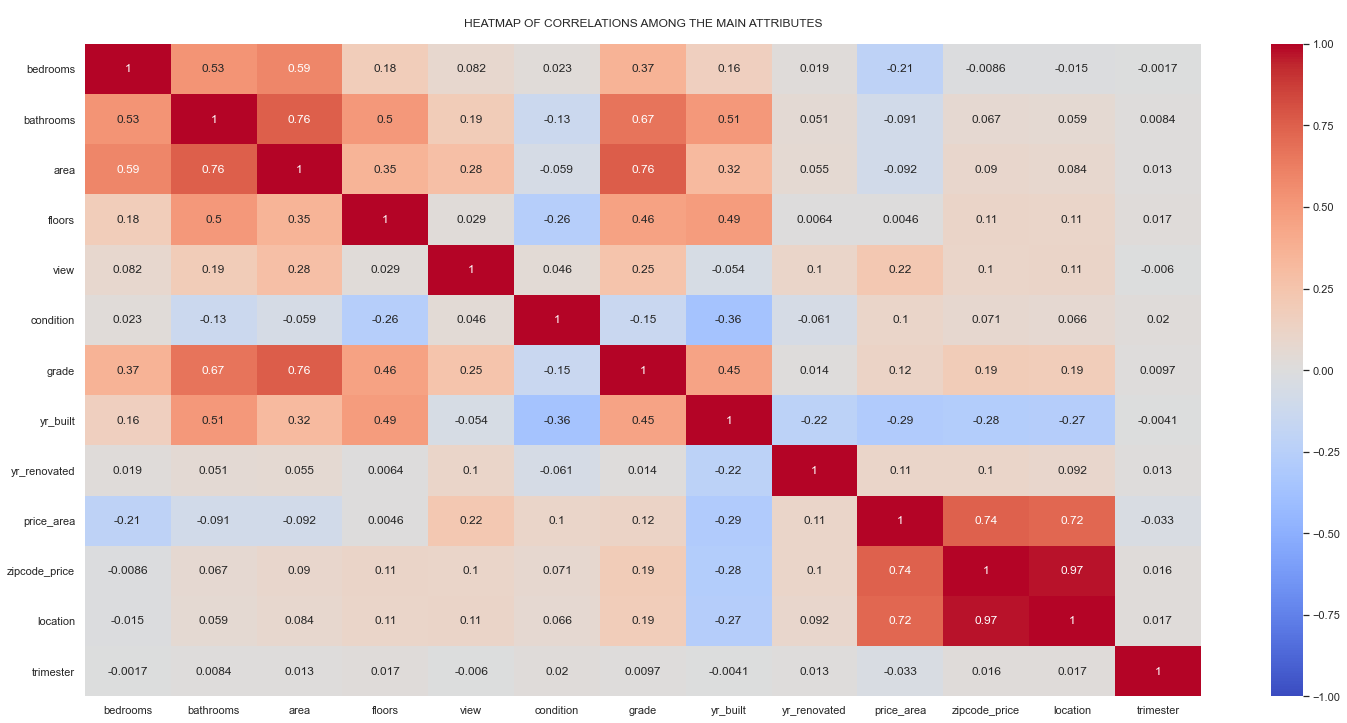

In [81]:
sns.heatmap(multi_analysis.corr(), annot=True, vmin = -1, vmax=1, cmap='coolwarm')
plt.title('\nHEATMAP OF CORRELATIONS AMONG THE MAIN ATTRIBUTES\n')
plt.savefig(r'../reports/figures/corr_heatmap.png')

In [82]:
print('The most significant correlation wih the price_area is with location/zipcode_price')

The most significant correlation wih the price_area is with location/zipcode_price


# Hipotesys validation

In [83]:
df6 = df5.copy()

## Houses with waterfront are more expensive - True

In [84]:
df_nowater = df6[df6 ['waterfront'] == 'no' ]
df_water   = df6[df6 ['waterfront'] == 'yes']

print('The average price per squarefoot of the no waterview houses is US$ {:.2f}'.format( df_nowater['price_area'].mean() ) )

print('The average price per squarefoot of the  waterview houses is US$ {:.2f}'.  format( df_water  ['price_area'].mean() ) )

print('The houses with waterview are {:.2f} % more expansive in average than the no-view ones'.format((df_water['price_area'].mean() / df_nowater['price_area'].mean() )*100))

The average price per squarefoot of the no waterview houses is US$ 262.25
The average price per squarefoot of the  waterview houses is US$ 508.10
The houses with waterview are 193.74 % more expansive in average than the no-view ones


In [85]:
#Comparing water and zipcodes
zipcode_water = df_water['zipcode'].tolist()
aux6 = df_nowater[df_nowater['zipcode'].isin(zipcode_water)]

print('The average price per squarefoot of the no waterview houses that are in the same zipcode that the ones with it is US$ {:.2f}'.format( aux6['price_area'].mean())  )
print('The difference remains even if we compare houses without view near the view ones.')

The average price per squarefoot of the no waterview houses that are in the same zipcode that the ones with it is US$ 282.55
The difference remains even if we compare houses without view near the view ones.


## Houses that were not renovated are cheaper - True

In [86]:
aux6 = df6[df6['yr_renovated'] == 0]
not_renovated_price= aux6['price_area'].mean()

In [87]:
aux6 = df6[df6['yr_renovated'] != 0]
renovated_price=aux6['price_area'].mean()

In [88]:
print('House that were not renovated are {:.2f} % cheaper than the renovated ones'.format(  ((renovated_price/not_renovated_price) - 1 )*100))

House that were not renovated are 22.02 % cheaper than the renovated ones


## There is a time of year when more houses are sold - True

In [89]:
df6.head()

id       date  bedrooms  bathrooms  area  floors waterfront  view  condition  grade  yr_built  yr_renovated  zipcode  price_area  zipcode_price  location  trimester
0  7129300520 2014-10-13         3       1.00  1180    1.00         no     0          3      7      1955             0    98178      188.05         189.17        17       4.00
1  6414100192 2014-12-09         3       2.25  2570    2.00         no     0          3      7      1951          1991    98125      209.34         282.67        45       4.00
2  5631500400 2015-02-25         2       1.00   770    1.00         no     0          3      6      1933             0    98028      233.77         225.14        26       1.00
3  2487200875 2014-12-09         4       3.00  1960    1.00         no     0          5      7      1965             0    98136      308.16         337.22        53       4.00
4  1954400510 2015-02-18         3       2.00  1680    1.00         no     0          3      8      1987             0    98074      303.57         265.67        38       1.00

In [90]:
trimester_sales = df6[['id','trimester']].groupby('trimester').count().reset_index()
trimester_sales

trimester    id
0       1.00  4100
1       2.00  6820
2       3.00  5921
3       4.00  4755

In [91]:
trimester_sales['%'] = (trimester_sales['id'] / total_houses) * 100
trimester_sales

trimester    id     %
0       1.00  4100 18.98
1       2.00  6820 31.58
2       3.00  5921 27.42
3       4.00  4755 22.02

In [92]:
print('The second trimester is when most houses were sold, and the lower number of houses where negociated in the first trimester')

The second trimester is when most houses were sold, and the lower number of houses where negociated in the first trimester


##  There is a main numerical feature beyound the area that raises the prices - False

In [93]:
print('There are no relevant correlation with other numerical feature. As we see in the bivariate analysis, all the numerical features like number of bedrooms or bathrooms have a few correlation with the price/area.')

There are no relevant correlation with other numerical feature. As we see in the bivariate analysis, all the numerical features like number of bedrooms or bathrooms have a few correlation with the price/area.


## Localization is the most important categorical feature for houses. - True

In [94]:
print('The most important feature that raise the prices is the location.')

The most important feature that raise the prices is the location.


# Business Insights

In [95]:
df7 = df6.copy()

## Houses with price below the average price for the zip code would be a good deal

In [96]:
aux7 = df7[['id','price_area','area','zipcode_price', 'condition']]
cheap_houses = aux7[aux7['price_area'] < aux7['zipcode_price']]

In [97]:
cheap_houses = cheap_houses [cheap_houses['condition'] != 4]
#houses with condition equal 4 will be renovated before sale

In [98]:
# answering the prices for buy and sell
cheap_houses['max_price_buy']  = cheap_houses['area'] * cheap_houses['price_area']
cheap_houses['min_price_sell'] = cheap_houses['area'] * cheap_houses['zipcode_price']
cheap_houses['profit'] = cheap_houses['min_price_sell'] - cheap_houses['max_price_buy']
cheap_houses.head()

id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell    profit
0  7129300520      188.05  1180         189.17          3      221900.00       223223.58   1323.58
1  6414100192      209.34  2570         282.67          3      538000.00       726461.61 188461.61
3  2487200875      308.16  1960         337.22          5      604000.00       660947.35  56947.35
5  7237550310      226.01  5420         268.40          3     1225000.00      1454729.01 229729.01
6  1321400060      150.15  1715         157.11          3      257500.00       269449.51  11949.51

In [99]:
print('There is {} houses who price is below the average price for its region. This houses should be bought. The gross profit is about US$ {:.2f}'.format(cheap_houses.shape[0], cheap_houses['profit'].sum()))

There is 9354 houses who price is below the average price for its region. This houses should be bought. The gross profit is about US$ 971108343.18


## Houses with price equal or below the average price for the zip code AND condition equal '4' would be a good opportunity to high the grade and profit

In [100]:
condition4 = aux7[(aux7['price_area'] <= aux7['zipcode_price']) & (aux7['condition'] == 4)]
condition4.head()

id  price_area  area  zipcode_price  condition
12   114101516      216.78  1430         225.14          4
17  6865200140      303.12  1600         369.80          4
20  6300500875      237.65  1620         253.97          4
24  3814700200      134.29  2450         155.16          4
32   461000390      295.06  2330         363.54          4

In [101]:
print('There are {} houses whos price is below the average price for its region and the condition is equal 4.'.format(condition4.shape[0]))

There are 2975 houses whos price is below the average price for its region and the condition is equal 4.


To know the expected profit, we have to compare the prices with the condition 5 houses.

In [102]:
condition5 = df7[(df7['condition'] == 5) & (df7['price_area'] >= df7['zipcode_price'])] # excluding the 5-condition houses with price below the average price for the zipcode
condition5.head()

id       date  bedrooms  bathrooms  area  floors waterfront  view  condition  grade  yr_built  yr_renovated  zipcode  price_area  zipcode_price  location  trimester
27   3303700376 2014-12-01         3       1.00  1400    1.50         no     0          5      8      1909             0    98112      476.43         438.64        67       4.00
49    822039084 2015-03-11         3       2.50  2753    1.00        yes     2          5      9      1953             0    98070      490.37         277.85        43       1.00
74   3444100400 2015-03-16         3       1.75  1790    1.00         no     0          5      7      1965             0    98042      194.97         164.38         8       1.00
111  3362400511 2015-03-04         3       1.75  1260    1.00         no     0          5      6      1905             0    98103      452.38         369.80        59       1.00
166  2009000370 2015-02-19         2       1.75  1340    1.00         no     0          5      5      1949             0    98198      201.46         178.43        13       1.00

In [103]:
cond_5_price = condition5['price_area'].mean() # average price/area for the 5-condition houses

In [104]:
# the prices for buy and sell
condition4['max_price_buy' ] = condition4['area'] * condition4['price_area']
condition4['min_price_sell'] = condition4['area'] * cond_5_price

<ipython-input-104-8769225be36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4['max_price_buy' ] = condition4['area'] * condition4['price_area']
<ipython-input-104-8769225be36f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4['min_price_sell'] = condition4['area'] * cond_5_price


In [105]:
condition4['gross_profit'] = condition4['min_price_sell'] - condition4['max_price_buy']
condition4.head()

<ipython-input-105-97c35cd87224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition4['gross_profit'] = condition4['min_price_sell'] - condition4['max_price_buy']


id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell  gross_profit
12   114101516      216.78  1430         225.14          4      310000.00       500076.02     190076.02
17  6865200140      303.12  1600         369.80          4      485000.00       559525.62      74525.62
20  6300500875      237.65  1620         253.97          4      385000.00       566519.69     181519.69
24  3814700200      134.29  2450         155.16          4      329000.00       856773.61     527773.61
32   461000390      295.06  2330         363.54          4      687500.00       814809.19     127309.19

In [106]:
print('The profit expected with the 4 condition houses is US$ {:.2f}'. format(condition4['gross_profit'].sum()))

The profit expected with the 4 condition houses is US$ 834411054.54


# Data Products

## Getting the houses addresses

In [107]:
def get_address (houses):
    houses['road'] = 'NA'
    houses['house_number'] = 'NA'
    houses['city'] = 'NA'
    houses['county'] = 'NA'
    houses['state'] = 'NA'

    geolocator = Nominatim (user_agent = 'geopiExercises')
    for i in range (len(houses)):
        query = str(houses.loc[i,'lat']) + ',' + str(houses.loc[i,'long'])
        #api request
        response = geolocator.reverse(query)
        #populate data
        if 'house_number' in response.raw['address']:
            houses.loc[i, 'house_number'] = response.raw ['address']['house_number']
        if 'road' in response.raw['address']:
            houses.loc[i, 'road'] = response.raw ['address']['road']
        if 'neighbourhood' in response.raw['address']:
            houses.loc[i, 'neighbourhood'] = response.raw ['address']['neighbourhood']
        if 'city' in response.raw['address']:
            houses.loc[i, 'city'] = response.raw ['address']['city']
        if 'county' in response.raw['address']:
            houses.loc[i, 'county'] = response.raw ['address']['county']
        if 'state' in response.raw['address']:
            houses.loc[i, 'state'] = response.raw ['address']['state']
    return houses

## Should by houses

In [108]:
cheap_houses_df = cheap_houses.copy()

In [109]:
cheap_houses_df = pd.merge(cheap_houses, df4[['id','lat','long']] , how='left', on='id')

In [110]:
cheap_houses_df.head()

id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell    profit   lat    long
0  7129300520      188.05  1180         189.17          3      221900.00       223223.58   1323.58 47.51 -122.26
1  6414100192      209.34  2570         282.67          3      538000.00       726461.61 188461.61 47.72 -122.32
2  2487200875      308.16  1960         337.22          5      604000.00       660947.35  56947.35 47.52 -122.39
3  7237550310      226.01  5420         268.40          3     1225000.00      1454729.01 229729.01 47.66 -122.00
4  1321400060      150.15  1715         157.11          3      257500.00       269449.51  11949.51 47.31 -122.33

In [111]:
cheap_houses.isna().sum()

id                0
price_area        0
area              0
zipcode_price     0
condition         0
max_price_buy     0
min_price_sell    0
profit            0
dtype: int64

In [112]:
cheap_adress = get_address(cheap_houses_df)
# it tooks about 1.5 hours

In [113]:
cheap_adress.sample(5)

id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell    profit   lat    long                    road house_number      city       county       state  neighbourhood
3286  8965460090      293.93  3130         299.09          3      920000.00       936156.32  16156.32 47.56 -122.12    Southeast 48th Place        16715  Bellevue  King County  Washington            NaN
8061  3764390100      237.16  1830         265.95          3      434000.00       486692.61  52692.61 47.72 -122.22    Northeast 128th Lane         9205        NA  King County  Washington            NaN
4923  1938000140      277.40  2920         314.93          5      810000.00       919593.35 109593.35 47.59 -122.17  126th Avenue Southeast         2511  Bellevue  King County  Washington      Woodridge
778   8899210320      163.64  2200         180.40          3      360000.00       396885.48  36885.48 47.45 -122.21       South 31st Street          803        NA  King County  Washington  Victoria Park
4048  5647900120      129.84  1930         151.35          3      250600.00       292101.58  41501.58 47.33 -122.26      W Street Northwest         2025        NA  King County  Washington            NaN

In [114]:
cheap_adress.to_excel(r'../reports/shouldby_houses.xlsx')

## Should by and renovate

In [115]:
condition4_df = condition4.copy()
condition4_df = pd.merge(condition4_df, df4[['id','lat','long']] , how='left', on='id')

In [116]:
condition4_df.head()

id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell  gross_profit   lat    long
0   114101516      216.78  1430         225.14          4      310000.00       500076.02     190076.02 47.76 -122.23
1  6865200140      303.12  1600         369.80          4      485000.00       559525.62      74525.62 47.66 -122.34
2  6300500875      237.65  1620         253.97          4      385000.00       566519.69     181519.69 47.70 -122.34
3  3814700200      134.29  2450         155.16          4      329000.00       856773.61     527773.61 47.37 -122.17
4   461000390      295.06  2330         363.54          4      687500.00       814809.19     127309.19 47.68 -122.37

In [117]:
renovate4_houses = get_address(condition4_df)
# it tooks about half hour

In [118]:
renovate4_houses.sample(5)

id  price_area  area  zipcode_price  condition  max_price_buy  min_price_sell  gross_profit   lat    long                      road house_number     city       county       state          neighbourhood
1562  4167700240      122.02  2200         148.92          4      268450.00       769347.73     500897.73 47.33 -122.36    Southwest 307th Street         2403       NA  King County  Washington  Marine View Demarwood
919   8820900670      256.38  1560         282.67          4      399950.00       545537.48     145587.48 47.72 -122.29    Northeast 123rd Street         3630  Seattle  King County  Washington                    NaN
928   4197400005      185.71  2450         226.20          4      455000.00       856773.61     401773.61 47.46 -122.34  Sylvester Road Southwest        16407       NA  King County  Washington           Five Corners
40    3832710960      143.65  1810         154.22          4      260000.00       632963.36     372963.36 47.37 -122.28        South 263rd Street         4424       NA  King County  Washington                    NaN
171    751000060      261.48  1350         282.67          4      353000.00       472099.74     119099.74 47.71 -122.29     35th Avenue Northeast        11051  Seattle  King County  Washington                    NaN

In [119]:
renovate4_houses.to_excel(r'../reports/houses_4_renovate.xlsx')

## Map with all the houses

In [120]:
#identificando as casas de maior preço pelo tamanho da representação no mapa
map_price = df4[['id','lat','long', 'price']]

map_price_fig = px.scatter_mapbox (map_price, lat = 'lat', lon='long', size = 'price', color_continuous_scale = px.colors.cyclical.IceFire, size_max=15, zoom=10)

map_price_fig.update_layout (mapbox_style = 'open-street-map')

map_price_fig.update_layout (height=600, margin={'r':0, 't':0, 'l':0, 'b':0})

In [121]:
map_price_fig.show()

In [122]:
map_price_fig.write_html(r'../reports/map_price.html')

## App

In [123]:
#creating an organized database to the streamlit app

In [124]:
kc_houses_df = df4.copy()

In [125]:
kc_houses_df.head()

id       date     price  bedrooms  bathrooms  area  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  price_area  zipcode_price  location  trimester
0  7129300520 2014-10-13 221900.00         3       1.00  1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26      188.05         189.17        17       4.00
1  6414100192 2014-12-09 538000.00         3       2.25  2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32      209.34         282.67        45       4.00
2  5631500400 2015-02-25 180000.00         2       1.00   770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23      233.77         225.14        26       1.00
3  2487200875 2014-12-09 604000.00         4       3.00  1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39      308.16         337.22        53       4.00
4  1954400510 2015-02-18 510000.00         3       2.00  1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05      303.57         265.67        38       1.00

In [126]:
kc_houses_df.drop(columns = ['trimester'], inplace = True)
kc_houses_df.rename(columns = {'price':'price (US$)','area':'area(sqft)', 'price_area':'price/sqft', 'zipcode_price':'avg. zipcode price', 'location':'location grade'}, inplace=True)

In [127]:
kc_houses_df.head()

id       date  price (US$)  bedrooms  bathrooms  area(sqft)  sqft_lot  floors waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  price/sqft  avg. zipcode price  location grade
0  7129300520 2014-10-13    221900.00         3       1.00        1180      5650    1.00         no     0          3      7        1180              0      1955             0    98178 47.51 -122.26      188.05              189.17              17
1  6414100192 2014-12-09    538000.00         3       2.25        2570      7242    2.00         no     0          3      7        2170            400      1951          1991    98125 47.72 -122.32      209.34              282.67              45
2  5631500400 2015-02-25    180000.00         2       1.00         770     10000    1.00         no     0          3      6         770              0      1933             0    98028 47.74 -122.23      233.77              225.14              26
3  2487200875 2014-12-09    604000.00         4       3.00        1960      5000    1.00         no     0          5      7        1050            910      1965             0    98136 47.52 -122.39      308.16              337.22              53
4  1954400510 2015-02-18    510000.00         3       2.00        1680      8080    1.00         no     0          3      8        1680              0      1987             0    98074 47.62 -122.05      303.57              265.67              38

In [128]:
Localização dos should by
Localização dos condition 2
Localização dos condition 4
Ver todos e ir filtrando
Filtrar casas pelos principais features: quartos, vista pra agua, banheiros, andares

SyntaxError: invalid syntax (<ipython-input-128-df700cfea2d8>, line 1)

# Conclusion

# Next steps

- Defining a % for 2 and 4-condition houses, it can be bought more houses
- Use ML models to find clusters among the houses and classify them
- Can use the data to a simple regression model to the price of selling future houses